# Phi->ee ML analysis

In this version we use official ALICE Phi simulations and the data sidebands

# STARlight parser

In [1]:
# import pandas as pd

# def parse_starlight_output(file_path):
#     events = []
#     vertices = []
#     tracks = []
    
#     with open(file_path, 'r') as file:
#         current_event = None
#         current_vertex = None
        
#         for line in file:
#             if line.startswith("EVENT"):
#                 if current_event:
#                     events.append(current_event)
#                 event_data = line.split()
#                 current_event = {
#                     "Event Number": int(event_data[1]),
#                     "Number of Tracks": int(event_data[2]),
#                     "Number of Vertices": int(event_data[3]),
#                     "Vertices": [],
#                     "Tracks": []
#                 }
#             elif line.startswith("VERTEX"):
#                 vertex_data = line.split()
#                 current_vertex = {
#                     "x": float(vertex_data[1]),
#                     "y": float(vertex_data[2]),
#                     "z": float(vertex_data[3]),
#                     "t": float(vertex_data[4]),
#                     "Vertex Number": int(vertex_data[5]),
#                     "Process Number": int(vertex_data[6]),
#                     "Parent Track": int(vertex_data[7]),
#                     "Number of Daughters": int(vertex_data[8])
#                 }
#                 current_event["Vertices"].append(current_vertex)
#             elif line.startswith("TRACK"):
#                 track_data = line.split()
#                 track = {
#                     "GPID": int(track_data[1]),
#                     "px": float(track_data[2]),
#                     "py": float(track_data[3]),
#                     "pz": float(track_data[4]),
#                     "Event Number": int(track_data[5]),
#                     "Track Number": int(track_data[6]),
#                     "Stop Vertex": int(track_data[7]),
#                     "PDGPID": int(track_data[8])
#                 }
#                 current_event["Tracks"].append(track)
        
#         if current_event:
#             events.append(current_event)
    
#     # Flatten the data into lists of dictionaries for DataFrame conversion
#     event_list = []
#     vertex_list = []
#     track_list = []
    
#     for event in events:
#         event_list.append({
#             "Event Number": event["Event Number"],
#             "Number of Tracks": event["Number of Tracks"],
#             "Number of Vertices": event["Number of Vertices"]
#         })
        
#         for vertex in event["Vertices"]:
#             vertex["Event Number"] = event["Event Number"]
#             vertex_list.append(vertex)
        
#         for track in event["Tracks"]:
#             track_list.append(track)
    
#     # Convert to DataFrames
#     event_df = pd.DataFrame(event_list)
#     vertex_df = pd.DataFrame(vertex_list)
#     track_df = pd.DataFrame(track_list)
    
#     return event_df, vertex_df, track_df

# Example usage:
# event_df, vertex_df, track_df = parse_starlight_output('starlight_output.txt')

# Display the dataframes
# print(event_df.head())
# print(vertex_df.head())
# print(track_df.head())


In [2]:
# import pandas as pd
# import numpy as np
# from scipy.constants import c
# import vector


# # Assuming the parse_starlight_output function from the previous code has been defined

# def group_tracks_by_event(track_df):
#     grouped_tracks = track_df.groupby('Event Number').apply(lambda x: x.to_dict(orient='records'), include_groups=False).to_dict()
#     return grouped_tracks


# def create_lorentz_vector(px, py, pz, mass):
#     vec = vector.obj(px=px, py=py, pz=pz, E=(px**2 + py**2 + pz**2 + mass**2)**0.5)
#     return vec


# def get_mass_from_pdgid(pdgid):
#     # This function would return the mass based on PDG ID
#     # For simplicity, assuming some common particle masses
#     pdg_masses = {
#         11: 0.000511,  # Electron mass in GeV/c^2
#         13: 0.10566,   # Muon mass in GeV/c^2
#         211: 0.13957,  # Pion mass in GeV/c^2
#         # Add more particles as needed
#     }
#     return pdg_masses.get(abs(pdgid), 0)  # Default to 0 if mass is unknown


# def apply_smearing(momentum):
#     """
#     Applies Gaussian smearing to a momentum component.
    
#     Parameters:
#     momentum (float): Original momentum component (px, py, or pz).
#     resolution_params (dict): Parameters for smearing, e.g., {"a": 0.01, "b": 0.05}.
    
#     Returns:
#     float: Smeared momentum component.
#     """
#     a = 0.0025
#     b = 0.005
#     sigma = np.sqrt((a * momentum)**2 + b**2)  # Resolution formula
#     return np.random.normal(momentum, sigma)


# def perform_operations_on_event(grouped_tracks):
#     """
#     Creates a DataFrame with all Lorentz vectors for each event using the vector package.

#     Parameters:
#     grouped_tracks (dict): A dictionary where keys are event numbers and values are lists of track dictionaries.

#     Returns:
#     DataFrame: A DataFrame with columns ['Event Number', 'Track Number', 'Energy', 'px', 'py', 'pz'].
#     """
#     daughters_list = []
#     mothers_list = []

#     for event_number, event_tracks in grouped_tracks.items():
#         mother = create_lorentz_vector(0., 0., 0., 0.)
#         for track in event_tracks:
#             mass = get_mass_from_pdgid(track['PDGPID'])
#             vec = create_lorentz_vector(track['px'], track['py'], track['pz'], mass)
#             # smeared_px = apply_smearing(track['px'])
#             # smeared_py = apply_smearing(track['py'])
#             # smeared_pz = apply_smearing(track['pz'])

#             # vec = create_lorentz_vector(smeared_px, smeared_py, smeared_pz, mass)

#             daughters_list.append({
#                 'Event Number': event_number,
#                 'Track Number': track['Track Number'],
#                 'Energy': vec.E,
#                 'px': vec.px,
#                 'py': vec.py,
#                 'pz': vec.pz
#             })
#             mother += vec
#         mothers_list.append({
#             'mother': mother,
#             'Energy': mother.E,
#             'px': mother.px,
#             'py': mother.py,
#             'pz': mother.pz
#         })

#     # Create DataFrame
#     daughters_df = pd.DataFrame(daughters_list)
#     mothers_df = pd.DataFrame(mothers_list)

#     return daughters_df, mothers_df


In [3]:
import matplotlib.pyplot as plt
import numpy as np

def plot_mass_and_pt_distribution(df):
    """
    Plots the mass distribution and transverse momentum distribution from a DataFrame.

    Parameters:
    df (DataFrame): Input DataFrame with columns 'mother', 'Energy', 'px', 'py', 'pz'.
    """

    # Calculate the mass and transverse momentum (p_T) for each row
    df['mass'] = df['mother'].apply(lambda v: v.mass)
    df['pt'] = df['mother'].apply(lambda v: v.pt)

    # Create a figure with two subplots
    fig, ax = plt.subplots(2, 1, figsize=(10, 10))

    # Plot the mass distribution
    ax[0].hist(df['mass'], bins=50, color='blue', alpha=0.7)
    ax[0].set_title('Mass Distribution')
    ax[0].set_xlabel('Mass (GeV/c^2)')
    ax[0].set_ylabel('Frequency')

    # Plot the transverse momentum distribution
    ax[1].hist(df['pt'], bins=50, color='green', alpha=0.7)
    ax[1].set_title('Transverse Momentum Distribution')
    ax[1].set_xlabel('p_T (GeV/c)')
    ax[1].set_ylabel('Frequency')

    # Adjust layout and show the plots
    plt.tight_layout()
    plt.show()

# Example usage:
# Assuming df is your input DataFrame with a 'mother' column containing vector objects
# plot_mass_and_pt_distribution(df)


In [4]:
# event_df, vertex_df, track_df = parse_starlight_output('slight-phi-ee.out')
# grouped_tracks = group_tracks_by_event(track_df)
# daughters_df, phi_df = perform_operations_on_event(grouped_tracks)
# print(phi_df.head())


In [5]:
# plot_mass_and_pt_distribution(phi_df)

In [6]:
# print(daughters_df.head())

#### Checking distributions

In [7]:
import matplotlib.pyplot as plt
import numpy as np

def plot_distributions_from_daughters(daughters_df):
    """
    Plots invariant mass, transverse momentum, and four-momentum norms of e+e- pairs 
    and single decay daughters based on the input DataFrame.
    
    Parameters:
    daughters_df (pd.DataFrame): DataFrame containing daughter particle information with 
                                 columns ['Event Number', 'Track Number', 'Energy', 'px', 'py', 'pz'].
    """
    # Group by event number to sum electron and positron four-momenta
    grouped = daughters_df.groupby('Event Number')
    
    # Calculate four-momentum components for e+e- pairs
    px_ee = grouped['px'].sum()
    py_ee = grouped['py'].sum()
    pz_ee = grouped['pz'].sum()
    energy_ee = grouped['Energy'].sum()
    
    # Invariant mass of e+e- pairs
    invariant_mass = np.sqrt(energy_ee**2 - (px_ee**2 + py_ee**2 + pz_ee**2))
    
    # Transverse momentum of e+e- pairs
    pt_ee_pairs = np.sqrt(px_ee**2 + py_ee**2)
    
    # Norm of four-momentum of e+e- pairs
    four_momentum_norm_ee_pairs = np.sqrt(px_ee**2 + py_ee**2 + pz_ee**2)
    
    # For single decay daughters
    four_momentum_norm_single = np.sqrt(daughters_df['px']**2 + daughters_df['py']**2 + daughters_df['pz']**2)
    pt_single = np.sqrt(daughters_df['px']**2 + daughters_df['py']**2)

    # Plotting
    fig, axs = plt.subplots(5, 1, figsize=(8, 20))

    axs[0].hist(invariant_mass, bins=50, color='skyblue', edgecolor='black')
    axs[0].set_title("Invariant Mass Distribution of e+e- Pairs")
    axs[0].set_xlabel("Invariant Mass (GeV/c^2)")
    axs[0].set_ylabel("Counts")

    axs[1].hist(pt_ee_pairs, bins=50, color='salmon', edgecolor='black')
    axs[1].set_title("Transverse Momentum (pT) Distribution of e+e- Pairs")
    axs[1].set_xlabel("Transverse Momentum (GeV/c)")
    axs[1].set_ylabel("Counts")

    axs[2].hist(four_momentum_norm_ee_pairs, bins=50, color='lightgreen', edgecolor='black')
    axs[2].set_title("Norm of Four-Momentum of e+e- Pairs")
    axs[2].set_xlabel("Four-Momentum Norm (GeV/c)")
    axs[2].set_ylabel("Counts")

    axs[3].hist(four_momentum_norm_single, bins=50, color='lightcoral', edgecolor='black')
    axs[3].set_title("Norm of Four-Momentum of Single Decay Daughters")
    axs[3].set_xlabel("Four-Momentum Norm (GeV/c)")
    axs[3].set_ylabel("Counts")

    axs[4].hist(pt_single, bins=50, color='lightblue', edgecolor='black')
    axs[4].set_title("Transverse Momentum (pT) Distribution of Single Decay Daughters")
    axs[4].set_xlabel("Transverse Momentum (GeV/c)")
    axs[4].set_ylabel("Counts")

    plt.tight_layout()
    plt.show()

# Example usage:
# plot_distributions_from_daughters(daughters_df)


In [8]:
# plot_distributions_from_daughters(daughters_gg_df)

### Checking multiple features tht could be fed as input to the ML algorithm

In [9]:
import matplotlib.pyplot as plt
import numpy as np

def plot_squared_momentum_diff(daughters_df):
    """
    Calculates and plots the distribution of the squared difference in norms of the momenta 
    of the two decay products (e+ and e-) in each event.
    
    Parameters:
    daughters_df (pd.DataFrame): DataFrame containing the daughter particle information with 
                                 columns ['Event Number', 'px', 'py', 'pz'].
    """
    # Calculate the norm of the momenta for each decay product
    daughters_df['momentum_norm'] = np.sqrt(daughters_df['px']**2 + daughters_df['py']**2 + daughters_df['pz']**2)
    
    # Group by event and get the norms for e+ and e- in each event
    momentum_norms = daughters_df.groupby('Event Number')['momentum_norm'].apply(list)
    
    # Calculate the squared difference in norms for each event
    squared_diff = [(norms[0] - norms[1])**2 for norms in momentum_norms if len(norms) == 2]
    
    # Plot the distribution with fixed binning
    plt.figure(figsize=(10, 6))
    plt.hist(squared_diff, bins=100, range=(-0.0, 0.05), color='purple', edgecolor='black', alpha=0.7)
    plt.title("Squared Difference in Norm of Momenta of Decay Products")
    plt.xlabel("Squared Difference in Norm of Momenta (GeV^2/c^2)")
    plt.ylabel("Counts")
    plt.show()

# Example usage:
# plot_squared_momentum_diff(daughters_df)


In [10]:
import matplotlib.pyplot as plt
import numpy as np

def calculate_and_plot_acoplanarity(daughters_df):
    """
    Calculates and plots the acoplanarity (alpha) for a dataset of decay products.
    
    Parameters:
    daughters_df (pd.DataFrame): DataFrame containing the daughter particle information with 
                                 columns ['Event Number', 'px', 'py'].
    """
    # Calculate the azimuthal angle (phi) for each particle
    daughters_df['phi'] = np.arctan2(daughters_df['py'], daughters_df['px'])
    
    # Group by event and get the azimuthal angles for each event
    phi_angles = daughters_df.groupby('Event Number')['phi'].apply(list)
    
    # Calculate acoplanarity for each event
    acoplanarity = [1 - abs(phis[0] - phis[1]) / np.pi for phis in phi_angles if len(phis) == 2]
    
    # Plot the acoplanarity distribution
    plt.figure(figsize=(10, 6))
    plt.hist(acoplanarity, bins=100, range=(0, 0.2), color='purple', edgecolor='black', alpha=0.7)
    plt.title("Acoplanarity Distribution of Decay Products")
    plt.xlabel("Acoplanarity (α)")
    plt.ylabel("Counts")
    plt.show()

# Example usage:
# calculate_and_plot_acoplanarity(daughters_df)


In [11]:
import matplotlib.pyplot as plt
import numpy as np

def calculate_and_plot_additional_features(daughters_df):
    """
    Calculates and plots distributions for energy asymmetry, longitudinal momentum difference, 
    and opening angle between decay products.
    
    Parameters:
    daughters_df (pd.DataFrame): DataFrame containing the daughter particle information with 
                                 columns ['Event Number', 'Energy', 'px', 'py', 'pz'].
    """
    # Group by event and get the properties for each particle in each event
    grouped = daughters_df.groupby('Event Number')
    energies = grouped['Energy'].apply(list)
    pz_values = grouped['pz'].apply(list)
    px_values = grouped['px'].apply(list)
    py_values = grouped['py'].apply(list)
    
    # Calculate Energy Asymmetry for each event
    energy_asymmetry = [(e[0] - e[1]) / (e[0] + e[1]) for e in energies if len(e) == 2]
    
    # Calculate Longitudinal Momentum Difference for each event
    longitudinal_momentum_diff = [abs(pz[0] - pz[1]) for pz in pz_values if len(pz) == 2]
    
    # Calculate Opening Angle for each event
    opening_angles = []
    for px, py in zip(px_values, py_values):
        if len(px) == 2 and len(py) == 2:
            p1 = np.array([px[0], py[0]])
            p2 = np.array([px[1], py[1]])
            cos_theta = np.dot(p1, p2) / (np.linalg.norm(p1) * np.linalg.norm(p2))
            opening_angles.append(np.arccos(cos_theta))

    # Plot Energy Asymmetry
    plt.figure(figsize=(10, 6))
    plt.hist(energy_asymmetry, bins=100, color='blue', edgecolor='black', alpha=0.7)
    plt.title("Energy Asymmetry of Decay Products")
    plt.xlabel("Energy Asymmetry")
    plt.ylabel("Counts")
    plt.show()
    
    # Plot Longitudinal Momentum Difference
    plt.figure(figsize=(10, 6))
    plt.hist(longitudinal_momentum_diff, bins=100, color='green', edgecolor='black', alpha=0.7)
    plt.title("Longitudinal Momentum Difference of Decay Products")
    plt.xlabel("Longitudinal Momentum Difference (GeV/c)")
    plt.ylabel("Counts")
    plt.show()

    # Plot Opening Angle
    plt.figure(figsize=(10, 6))
    plt.hist(opening_angles, bins=100, color='red', edgecolor='black', alpha=0.7)
    plt.title("Opening Angle Between Decay Products")
    plt.xlabel("Opening Angle (radians)")
    plt.ylabel("Counts")
    plt.show()

# Example usage:
# calculate_and_plot_additional_features(daughters_df)


## Feature engineering

In [12]:
import numpy as np

def filter_by_acceptance(daughters_df):
    """
    Filters events based on acceptance criteria:
    - Each track must have pseudorapidity |eta| < 0.8
    - The mother particle (sum of two decay products) must have rapidity |y| < 0.8
    
    Parameters:
    daughters_df (pd.DataFrame): DataFrame containing the daughter particle information with 
                                 columns ['Event Number', 'px', 'py', 'pz', 'Energy'].
    
    Returns:
    pd.DataFrame: Filtered DataFrame with events that meet the acceptance criteria.
    """
    # Calculate pseudorapidity (eta) for each track
    daughters_df['eta'] = 0.5 * np.log((np.sqrt(daughters_df['px']**2 + daughters_df['py']**2 + daughters_df['pz']**2) + daughters_df['pz']) /
                                       (np.sqrt(daughters_df['px']**2 + daughters_df['py']**2 + daughters_df['pz']**2) - daughters_df['pz']))
    
    # Filter tracks based on |eta| < 0.8
    eta_filtered = daughters_df[np.abs(daughters_df['eta']) < 0.8]
    
    # Group by event and calculate the total four-momentum of the mother particle
    grouped = eta_filtered.groupby('Event Number')
    mother_px = grouped['px'].sum()
    mother_py = grouped['py'].sum()
    mother_pz = grouped['pz'].sum()
    mother_energy = grouped['Energy'].sum()
    
    # Calculate rapidity (y) of the mother particle
    mother_rapidity = 0.5 * np.log((mother_energy + mother_pz) / (mother_energy - mother_pz))
    
    # Filter events based on |y| < 0.8 for the mother particle
    accepted_events = mother_rapidity[np.abs(mother_rapidity) < 0.8].index
    filtered_daughters_df = eta_filtered[eta_filtered['Event Number'].isin(accepted_events)]
    
    return filtered_daughters_df

# Example usage:
# filtered_daughters_df = filter_by_acceptance(daughters_df)
# filtered_daughters_gg_df = filter_by_acceptance(daughters_gg_df)


In [13]:
def compute_features(daughters_df):
    """
    Computes a set of features from the input filtered DataFrame, including:
    - Invariant mass of the e+e- pair
    - Transverse momentum (pT) of the e+e- pair
    - Squared difference in norms of momenta
    - Acoplanarity
    - Energy asymmetry
    - Longitudinal momentum difference
    - Opening angle between decay products
    
    Parameters:
    daughters_df (pd.DataFrame): Filtered DataFrame containing daughter particle information with 
                                 columns ['Event Number', 'px', 'py', 'pz', 'Energy'].
    
    Returns:
    pd.DataFrame: DataFrame containing computed features for each event.
    """
    # Group by event to compute pair-level features
    grouped = daughters_df.groupby('Event Number')
    
    # Initialize lists to collect computed features
    event_numbers = []
    invariant_masses = []
    pt_ee_pairs = []
    squared_momentum_diffs = []
    acoplanarities = []
    energy_asymmetries = []
    longitudinal_momentum_diffs = []
    opening_angles = []
    
    # Loop over each event
    for event_num, group in grouped:
        if len(group) != 2:
            continue  # Only process events with exactly two tracks

        # Extract track-level variables
        px1, py1, pz1, E1 = group.iloc[0][['px', 'py', 'pz', 'Energy']]
        px2, py2, pz2, E2 = group.iloc[1][['px', 'py', 'pz', 'Energy']]
        
        # Event-level variables
        event_numbers.append(event_num)
        
        # 1. Invariant mass of the e+e- pair
        total_energy = E1 + E2
        total_px = px1 + px2
        total_py = py1 + py2
        total_pz = pz1 + pz2
        invariant_mass = np.sqrt(total_energy**2 - total_px**2 - total_py**2 - total_pz**2)
        invariant_masses.append(invariant_mass)
        
        # 2. Transverse momentum (pT) of the e+e- pair
        pt_ee_pairs.append(np.sqrt(total_px**2 + total_py**2))
        
        # 3. Squared difference in norms of momenta
        norm1 = np.sqrt(px1**2 + py1**2 + pz1**2)
        norm2 = np.sqrt(px2**2 + py2**2 + pz2**2)
        squared_momentum_diffs.append((norm1 - norm2)**2)
        
        # 4. Acoplanarity
        phi1 = np.arctan2(py1, px1)
        phi2 = np.arctan2(py2, px2)
        phi_diff = abs(phi1 - phi2)
        phi_diff = min(phi_diff, 2 * np.pi - phi_diff)  # Ensure difference is within [0, π]
        acoplanarity = 1 - phi_diff / np.pi
        acoplanarities.append(acoplanarity)
        
        # 5. Energy asymmetry
        energy_asymmetry = (E1 - E2) / (E1 + E2)
        energy_asymmetries.append(energy_asymmetry)
        
        # 6. Longitudinal momentum difference
        longitudinal_momentum_diffs.append(abs(pz1 - pz2))
        
        # 7. Opening angle between decay products
        p1 = np.array([px1, py1, pz1])
        p2 = np.array([px2, py2, pz2])
        cos_theta = np.dot(p1, p2) / (np.linalg.norm(p1) * np.linalg.norm(p2))
        opening_angle = np.arccos(cos_theta)
        opening_angles.append(opening_angle)

    # Construct DataFrame with all computed features
    features_df = pd.DataFrame({
        'Event Number': event_numbers,
        'Invariant Mass': invariant_masses,
        'pT (e+e-)': pt_ee_pairs,
        'Squared Momentum Difference': squared_momentum_diffs,
        'Acoplanarity': acoplanarities,
        'Energy Asymmetry': energy_asymmetries,
        'Longitudinal Momentum Difference': longitudinal_momentum_diffs,
        'Opening Angle': opening_angles
    })
    
    return features_df

# filtered_daughters_df = filter_by_acceptance(daughters_df)
# features_df = compute_features(filtered_daughters_df)
# features_gg_df = compute_features(filtered_daughters_gg_df)


In [14]:
# features_df.head()

In [15]:
import matplotlib.pyplot as plt

def plot_features(features_df):
    """
    Plots histograms for each feature in the features DataFrame.
    
    Parameters:
    features_df (pd.DataFrame): DataFrame containing computed features for each event.
    """
    # Set up a figure with subplots for each feature
    n_features = features_df.shape[1] - 1  # Exclude the 'Event Number' column
    fig, axs = plt.subplots(n_features, 1, figsize=(10, 4 * n_features))
    
    # Plot each feature in a separate subplot
    for i, col in enumerate(features_df.columns[1:]):  # Skip 'Event Number' column
        axs[i].hist(features_df[col], bins=50, color='skyblue', edgecolor='black', alpha=0.7)
        axs[i].set_title(f"Distribution of {col}")
        axs[i].set_xlabel(col)
        axs[i].set_ylabel("Counts")
    
    plt.tight_layout()
    plt.show()

# Example usage:
# plot_features(features_df)


### Random forest

## Using ALICE data 

Keys in the ROOT file: ['DF_2336518081368096;1', 'DF_2336518081368096/O2tree;1']
Branches in the tree: ['fPX1', 'fPY1', 'fPZ1', 'fPE1', 'fPX2', 'fPY2', 'fPZ2', 'fPE2', 'fNCOUNTERPV', 'fNELECTRONSTOF']
       fPX1      fPY1      fPZ1      fPE1      fPX2      fPY2      fPZ2  \
0  0.380054 -0.298258  0.218900  0.530393 -0.394773  0.303569 -0.138682   
1 -0.006880  0.306499 -0.018638  0.307143  0.006890 -0.327766 -0.282457   
2 -0.074406 -0.541143 -0.165148  0.570654  0.046732  0.467763  0.282230   
3 -0.490760 -0.127637 -0.275347  0.577020  0.477005  0.131425 -0.227821   
4  0.031068  0.373844 -0.298184  0.479206 -0.021104 -0.371243  0.111860   

       fPE2  fNCOUNTERPV  fNELECTRONSTOF  
0  0.516946            2               0  
1  0.432736            2               0  
2  0.548307            2               1  
3  0.544710            2               0  
4  0.388304            2               0  

DataFrame for fNELECTRONSTOF = 0:
       fPX1      fPY1      fPZ1      fPE1      fPX2    

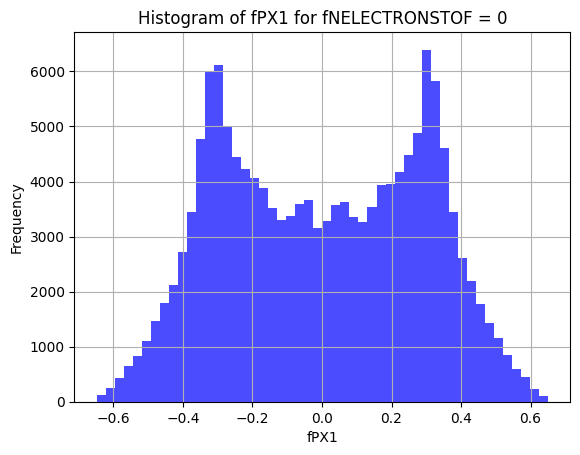

In [16]:
import uproot
import pandas as pd
import matplotlib.pyplot as plt

# Path to the ROOT file
root_file_path = "AO2D.root"

# Open the ROOT file
file = uproot.open(root_file_path)

# List all the keys (trees, histograms, etc.) in the file
print("Keys in the ROOT file:", file.keys())

# Access a specific tree by its name
tree_name = "DF_2336518081368096/O2tree"  # Replace with your tree name
tree = file[tree_name]

# Print the list of branches in the tree
print("Branches in the tree:", tree.keys())

# Convert the tree into a Pandas DataFrame for easy manipulation
branches_to_load = [
    "fPX1", "fPY1", "fPZ1", "fPE1",
    "fPX2", "fPY2", "fPZ2", "fPE2",
    "fNCOUNTERPV", "fNELECTRONSTOF"
]
df = tree.arrays(branches_to_load, library="pd")

# Display the first few rows of the DataFrame
print(df.head())

# Split the DataFrame into three based on the value of fNELECTRONSTOF
df_original = {}
for tof_value in [0, 1, 2]:
    df_subset = df[df["fNELECTRONSTOF"] == tof_value].copy()
    df_subset.drop(columns=["fNELECTRONSTOF"], inplace=True)  # Remove fNELECTRONSTOF column
    df_original[tof_value] = df_subset

# Verify the resulting DataFrames
for tof_value, subset_df in df_original.items():
    print(f"\nDataFrame for fNELECTRONSTOF = {tof_value}:")
    print(subset_df.head())

# Example: Plot a histogram of fPX1 for fNELECTRONSTOF = 0
branch_to_plot = "fPX1"
plt.hist(df_original[0][branch_to_plot], bins=50, color="blue", alpha=0.7)
plt.xlabel(branch_to_plot)
plt.ylabel("Frequency")
plt.title(f"Histogram of {branch_to_plot} for fNELECTRONSTOF = 0")
plt.grid(True)
plt.show()


In [17]:
df.head()

,fPX1,fPY1,fPZ1,fPE1,fPX2,fPY2,fPZ2,fPE2,fNCOUNTERPV,fNELECTRONSTOF
0,0.380054,-0.298258,0.218900,0.530393,-0.394773,0.303569,-0.138682,0.516946,2,0
1,-0.006880,0.306499,-0.018638,0.307143,0.006890,-0.327766,-0.282457,0.432736,2,0
2,-0.074406,-0.541143,-0.165148,0.570654,0.046732,0.467763,0.282230,0.548307,2,1
3,-0.490760,-0.127637,-0.275347,0.577020,0.477005,0.131425,-0.227821,0.544710,2,0
4,0.031068,0.373844,-0.298184,0.479206,-0.021104,-0.371243,0.111860,0.388304,2,0


Keys in the ROOT file: ['DF_2336986300000000;1', 'DF_2336986300000000/O2tree;1', 'parentFiles;1']
Branches in the tree: ['fPX1', 'fPY1', 'fPZ1', 'fPE1', 'fPX2', 'fPY2', 'fPZ2', 'fPE2', 'fNCOUNTERPV', 'fNELECTRONSTOF']
       fPX1      fPY1      fPZ1      fPE1      fPX2      fPY2      fPZ2  \
0 -0.444814 -0.111282  0.095485  0.468360  0.410228  0.131580 -0.189227   
1 -0.046926 -0.411486  0.169953  0.447669  0.062477  0.458947 -0.345003   
2 -0.232329  0.466674 -0.324831  0.614229  0.172748 -0.371504 -0.289023   
3  0.181233 -0.425218  0.312274  0.557827 -0.260428  0.439112  0.434741   
4 -0.398112 -0.351700  0.354662  0.638727  0.363641  0.324934  0.199371   

       fPE2  fNCOUNTERPV  fNELECTRONSTOF  
0  0.470540            2               2  
1  0.577549            2               2  
2  0.501389            2               2  
3  0.670553            2               2  
4  0.526845            2               2  

DataFrame for fNELECTRONSTOF = 0:
Empty DataFrame
Columns: [fPX1, fPY1, 

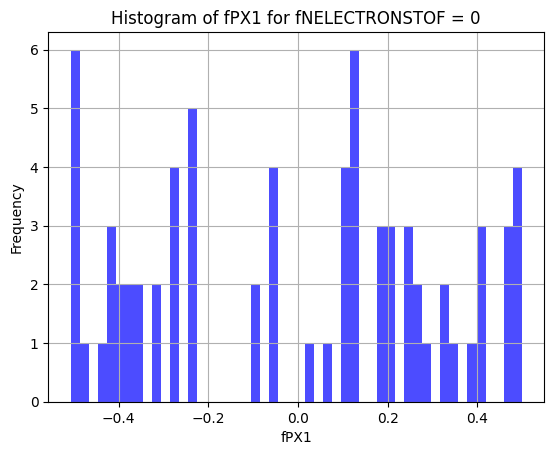

In [21]:
# Path to the ROOT file
root_file_path_mc = "AO2D_phi_DG.root"

# Open the ROOT file
file_mc = uproot.open(root_file_path_mc)

# List all the keys (trees, histograms, etc.) in the file
print("Keys in the ROOT file:", file_mc.keys())

# Access a specific tree by its name
tree_name_mc = "DF_2336986300000000/O2tree"  # Replace with your tree name
tree_mc = file_mc[tree_name_mc]

# Print the list of branches in the tree
print("Branches in the tree:", tree_mc.keys())

# Convert the tree into a Pandas DataFrame for easy manipulation
branches_to_load_mc = [
    "fPX1", "fPY1", "fPZ1", "fPE1",
    "fPX2", "fPY2", "fPZ2", "fPE2",
    "fNCOUNTERPV", "fNELECTRONSTOF"
]
df_mc = tree_mc.arrays(branches_to_load_mc, library="pd")

# Display the first few rows of the DataFrame
print(df_mc.head())

# Split the DataFrame into three based on the value of fNELECTRONSTOF
df_original_mc = {}
for tof_value in [0, 1, 2]:
    df_subset_mc = df_mc[df_mc["fNELECTRONSTOF"] == tof_value].copy()
    df_subset_mc.drop(columns=["fNELECTRONSTOF"], inplace=True)  # Remove fNELECTRONSTOF column
    df_original_mc[tof_value] = df_subset_mc

# Verify the resulting DataFrames
for tof_value, subset_df in df_original_mc.items():
    print(f"\nDataFrame for fNELECTRONSTOF = {tof_value}:")
    print(subset_df.head())

# Example: Plot a histogram of fPX1 for fNELECTRONSTOF = 0
branch_to_plot = "fPX1"
plt.hist(df_original_mc[2][branch_to_plot], bins=50, color="blue", alpha=0.7)
plt.xlabel(branch_to_plot)
plt.ylabel("Frequency")
plt.title(f"Histogram of {branch_to_plot} for fNELECTRONSTOF = 0")
plt.grid(True)
plt.show()


In [22]:
df_mc

,fPX1,fPY1,fPZ1,fPE1,fPX2,fPY2,fPZ2,fPE2,fNCOUNTERPV,fNELECTRONSTOF
0,-0.444814,-0.111282,0.095485,0.468360,0.410228,0.131580,-0.189227,0.470540,2,2
1,-0.046926,-0.411486,0.169953,0.447669,0.062477,0.458947,-0.345003,0.577549,2,2
2,-0.232329,0.466674,-0.324831,0.614229,0.172748,-0.371504,-0.289023,0.501389,2,2
3,0.181233,-0.425218,0.312274,0.557827,-0.260428,0.439112,0.434741,0.670553,2,2
4,-0.398112,-0.351700,0.354662,0.638727,0.363641,0.324934,0.199371,0.526845,2,2
...,...,...,...,...,...,...,...,...,...,...
67,-0.494405,-0.049383,0.256878,0.559340,0.530568,0.032194,0.344000,0.633147,2,2
68,0.261373,-0.463273,0.357156,0.640702,-0.266252,0.394088,0.349356,0.590123,2,2
69,0.118036,-0.496006,0.340530,0.613120,-0.051391,0.510264,0.348544,0.620076,2,2
70,0.473683,0.028873,0.307759,0.565619,-0.478543,-0.048114,0.247450,0.540879,2,2


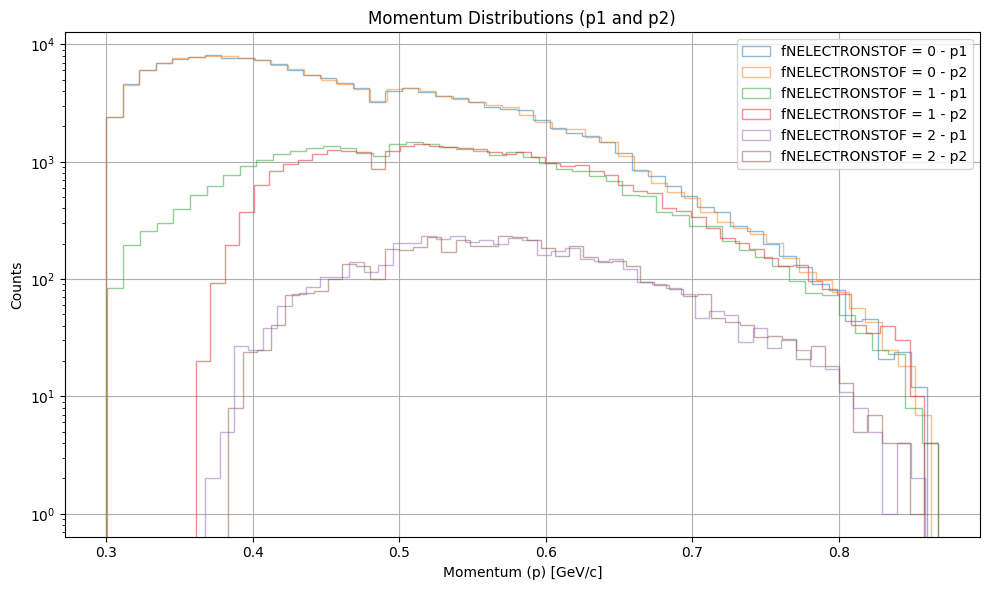

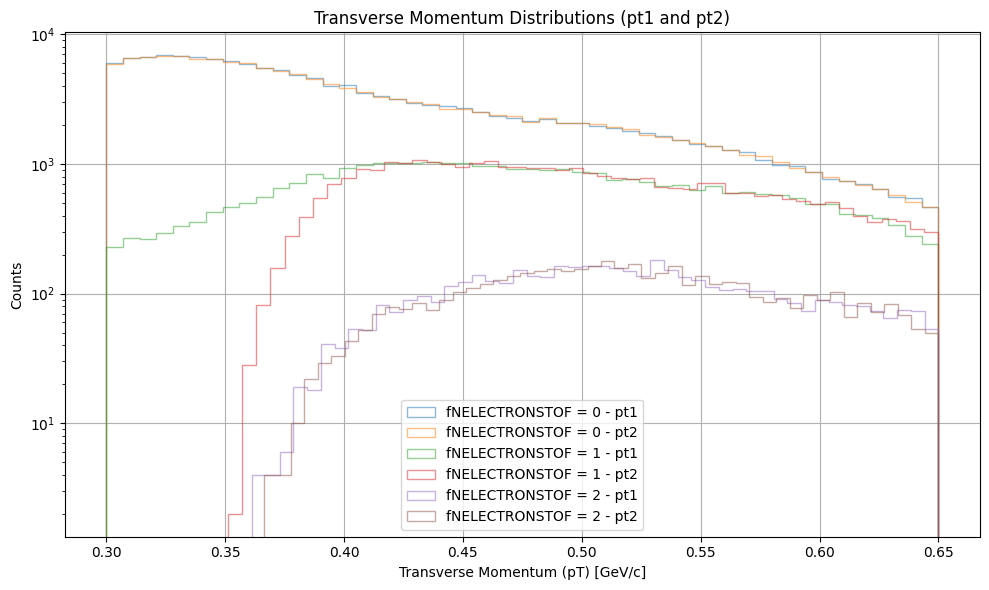

In [23]:
import numpy as np

def add_individual_momenta(dataframes):
    """
    Adds p1, p2, pt1, and pt2 columns to each DataFrame for individual tracks.

    Parameters:
    dataframes (dict): Dictionary of DataFrames, one for each fNELECTRONSTOF value.
    """
    for tof_value, df in dataframes.items():
        # Calculate momentum (p) and transverse momentum (pt) for individual tracks
        df["p1"] = np.sqrt(df["fPX1"]**2 + df["fPY1"]**2 + df["fPZ1"]**2)
        df["p2"] = np.sqrt(df["fPX2"]**2 + df["fPY2"]**2 + df["fPZ2"]**2)
        df["pt1"] = np.sqrt(df["fPX1"]**2 + df["fPY1"]**2)
        df["pt2"] = np.sqrt(df["fPX2"]**2 + df["fPY2"]**2)

def plot_individual_momenta(dataframes):
    """
    Plots p1 and p2, pt1 and pt2 on separate plots for the given DataFrames.

    Parameters:
    dataframes (dict): Dictionary of DataFrames, one for each fNELECTRONSTOF value.
    """
    # Plot p1 and p2
    plt.figure(figsize=(10, 6))
    for tof_value, df in dataframes.items():
        plt.hist(df["p1"], bins=50, alpha=0.5, label=f"fNELECTRONSTOF = {tof_value} - p1", histtype="step")
        plt.hist(df["p2"], bins=50, alpha=0.5, label=f"fNELECTRONSTOF = {tof_value} - p2", histtype="step")
    plt.yscale("log")
    plt.xlabel("Momentum (p) [GeV/c]")
    plt.ylabel("Counts")
    plt.title("Momentum Distributions (p1 and p2)")
    plt.legend()
    plt.grid()
    plt.tight_layout()
    plt.show()

    # Plot pt1 and pt2
    plt.figure(figsize=(10, 6))
    for tof_value, df in dataframes.items():
        plt.hist(df["pt1"], bins=50, alpha=0.5, label=f"fNELECTRONSTOF = {tof_value} - pt1", histtype="step")
        plt.hist(df["pt2"], bins=50, alpha=0.5, label=f"fNELECTRONSTOF = {tof_value} - pt2", histtype="step")
    plt.yscale("log")
    plt.xlabel("Transverse Momentum (pT) [GeV/c]")
    plt.ylabel("Counts")
    plt.title("Transverse Momentum Distributions (pt1 and pt2)")
    plt.legend()
    plt.grid()
    plt.tight_layout()
    plt.show()

# Add p1, p2, pt1, and pt2 to the DataFrames
add_individual_momenta(df_original)

# Plot the individual momentum distributions
plot_individual_momenta(df_original)


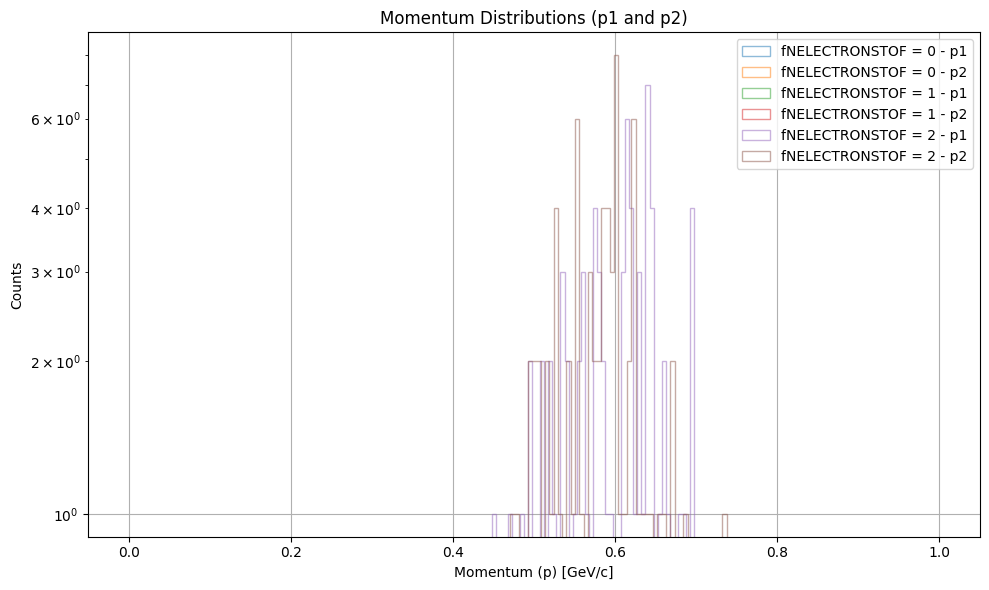

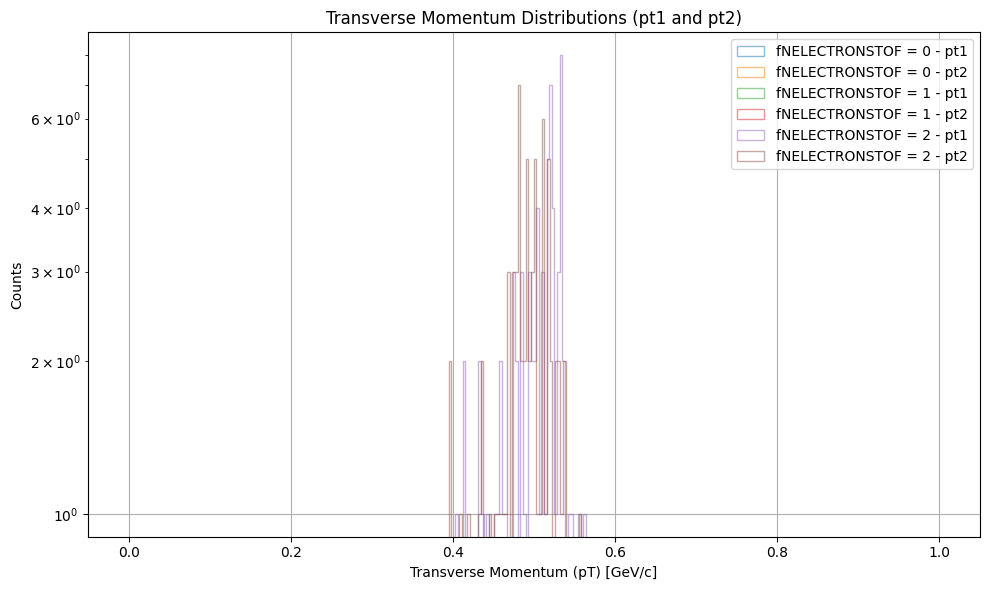

In [24]:
# Add p1, p2, pt1, and pt2 to the DataFrames
add_individual_momenta(df_original_mc)

# Plot the individual momentum distributions
plot_individual_momenta(df_original_mc)


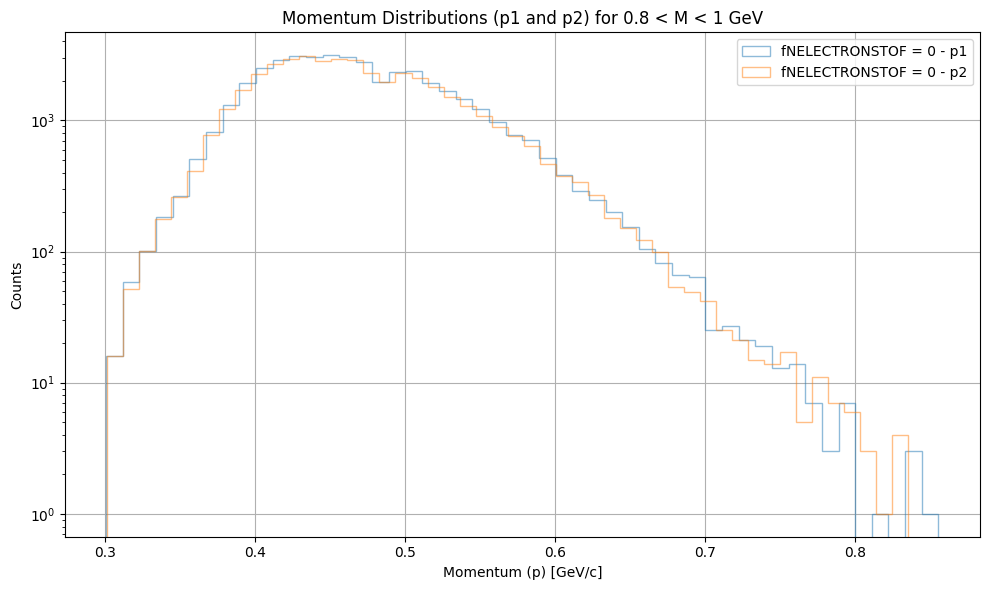

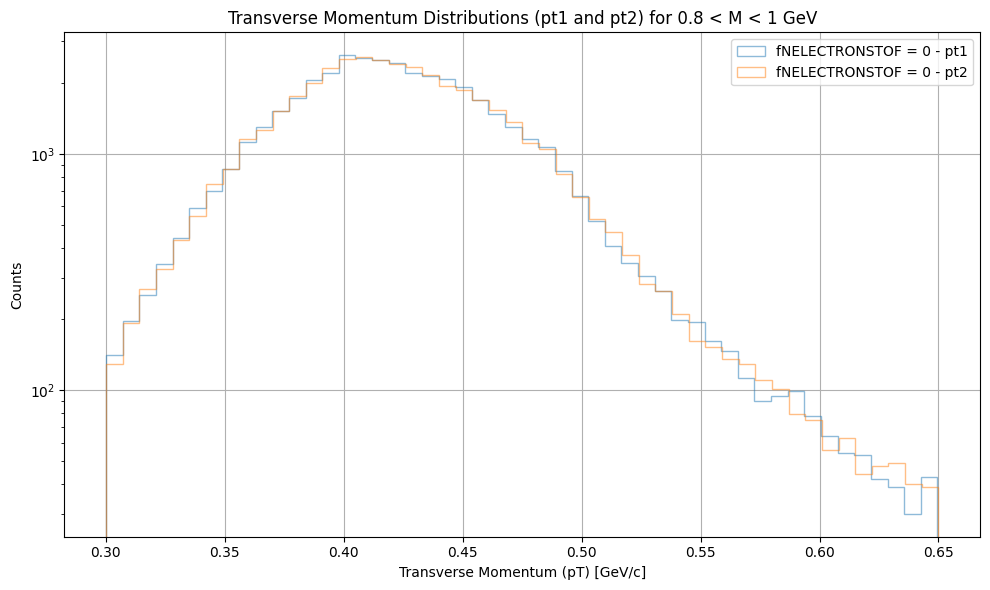

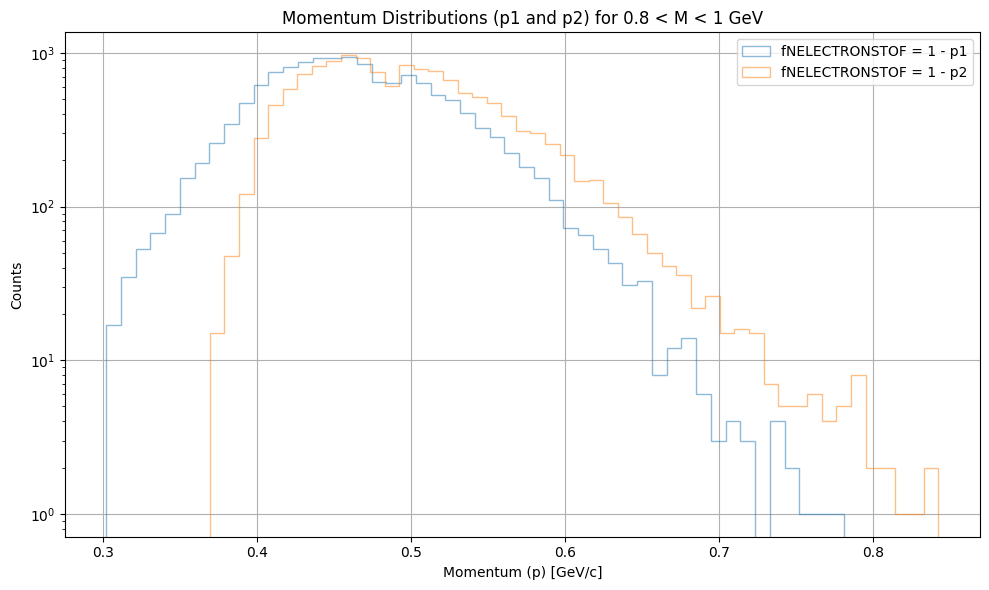

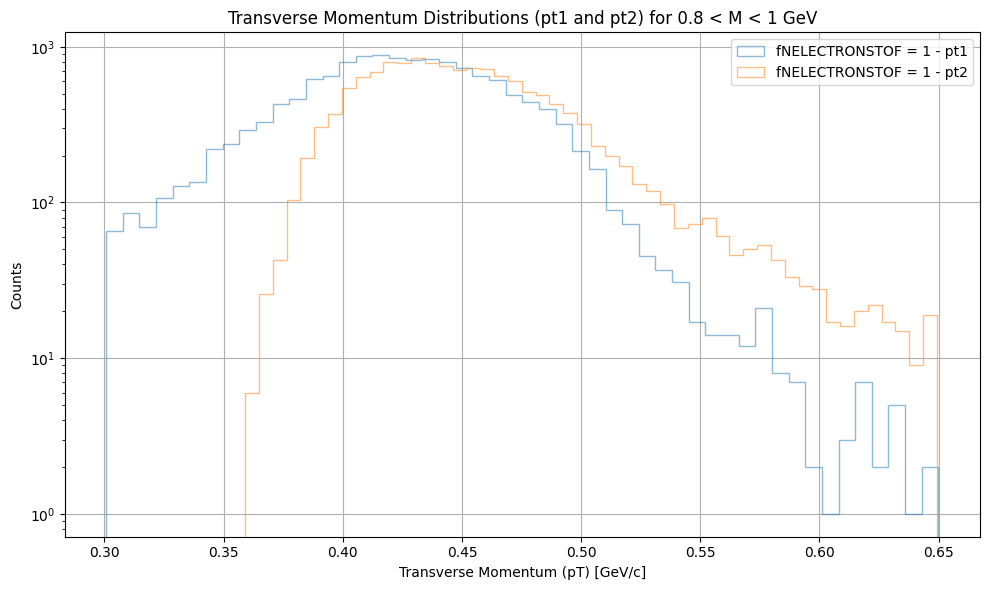

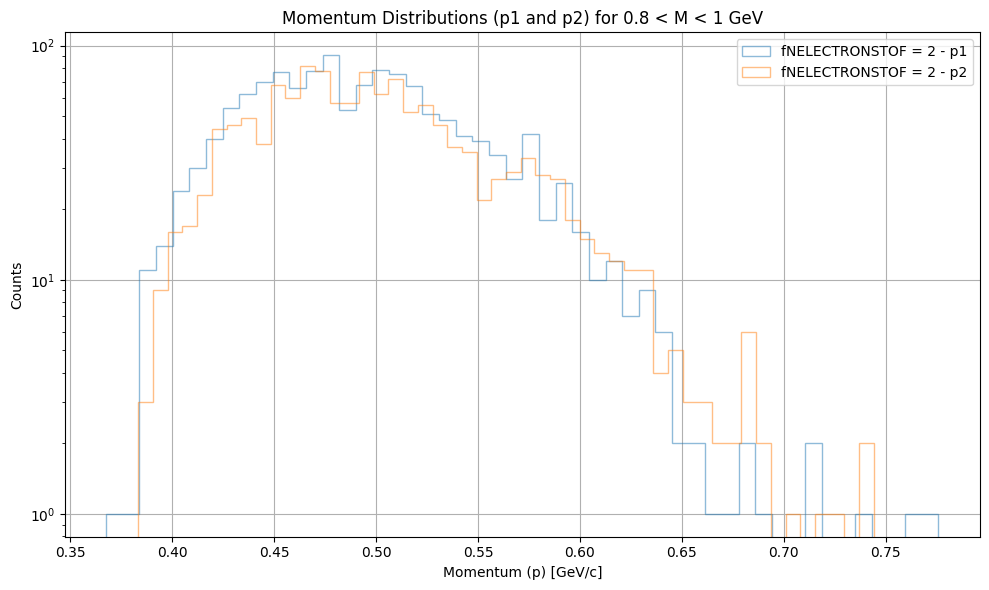

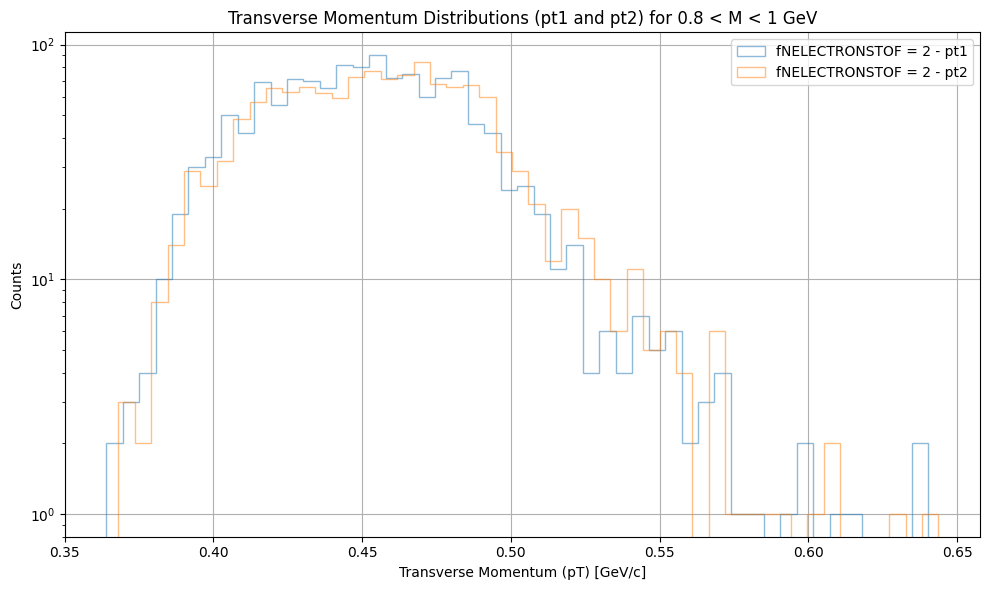

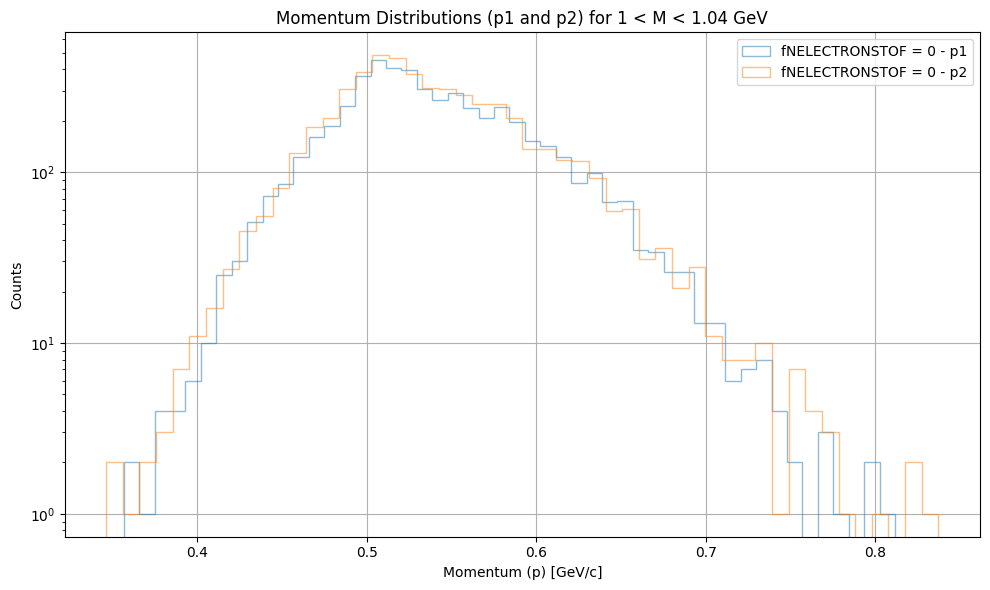

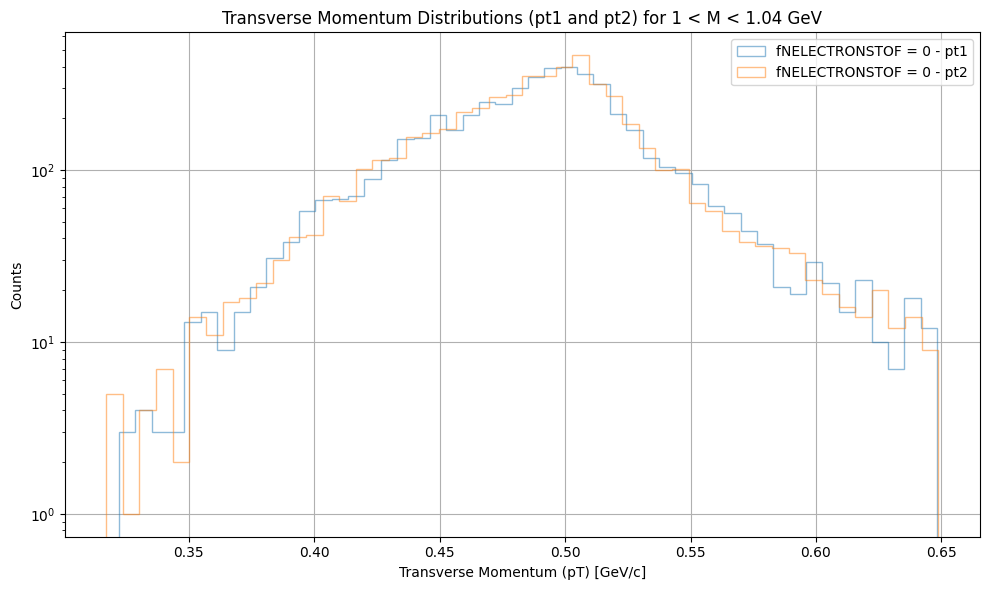

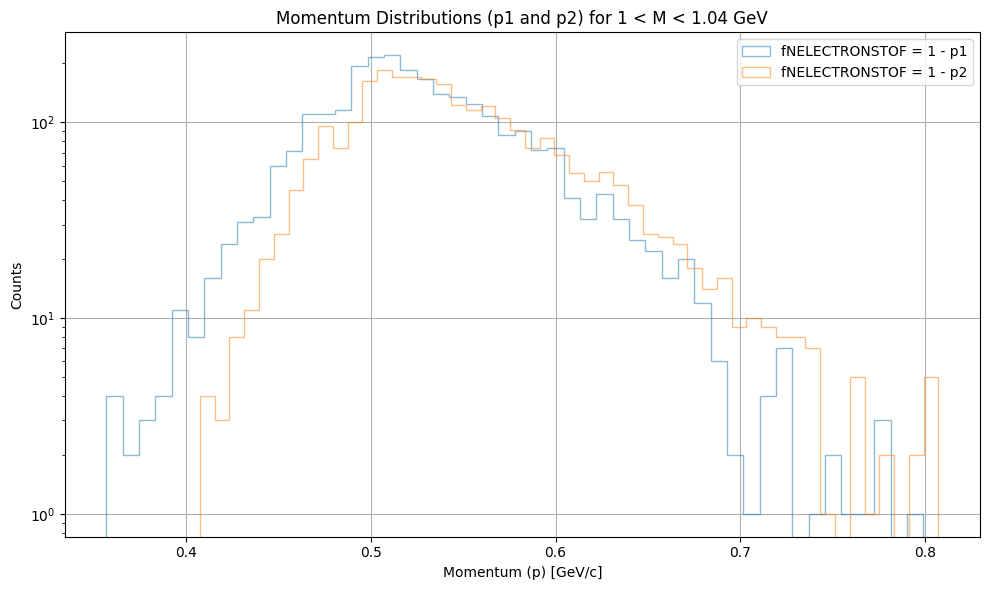

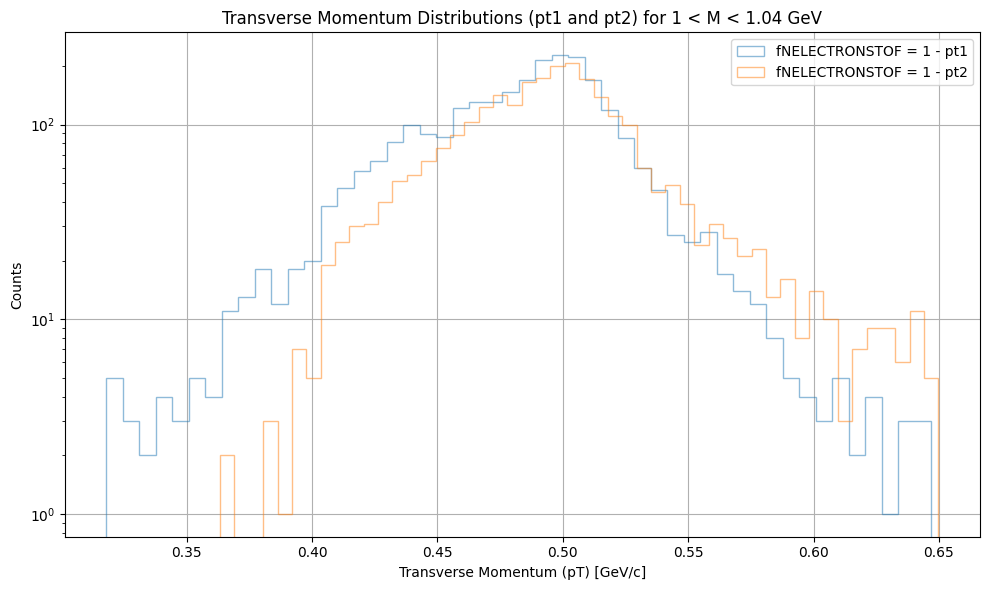

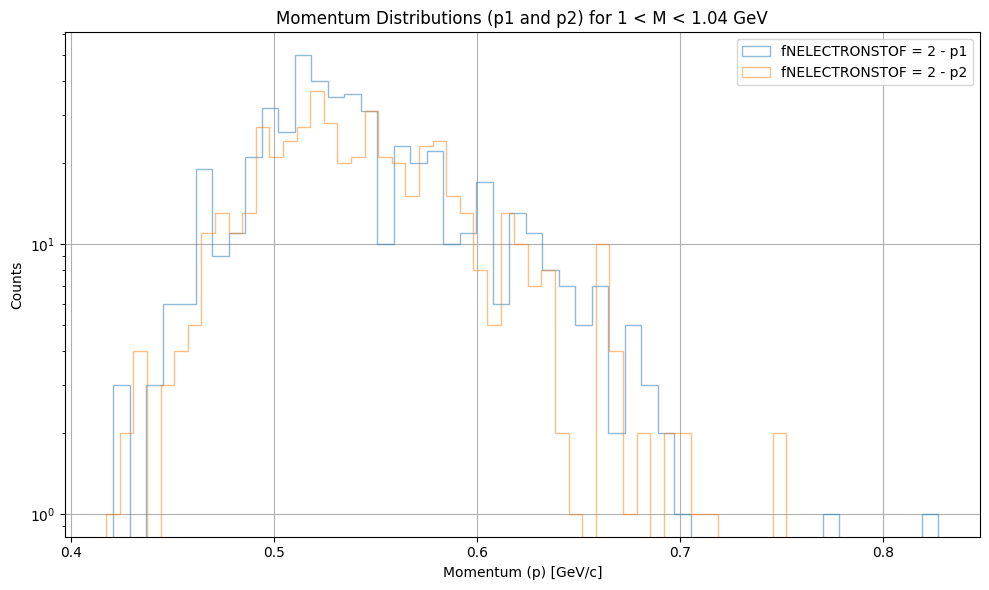

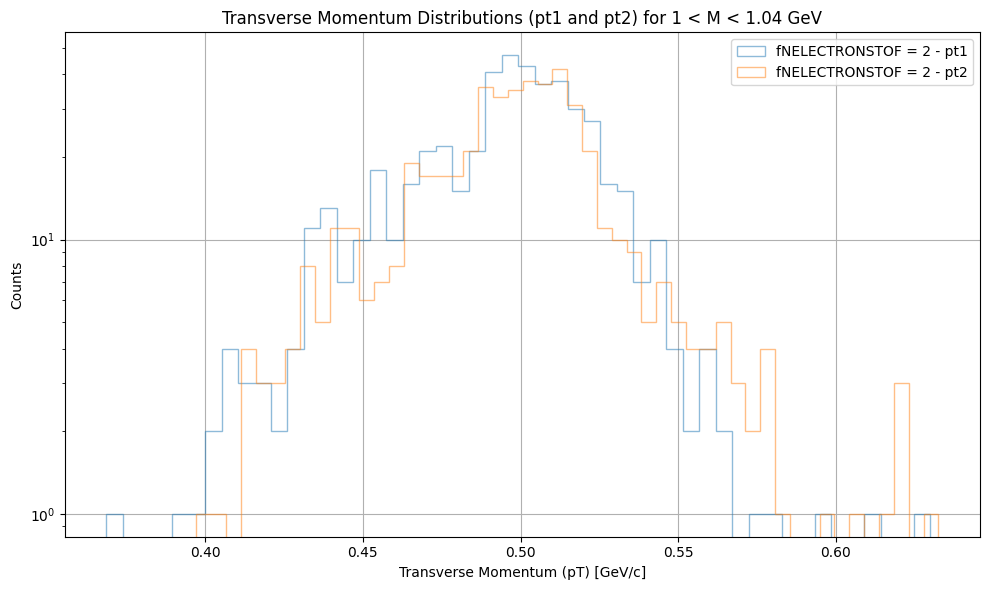

In [26]:
def add_invariant_mass(dataframes):
    """
    Adds the invariant mass (M) column to each DataFrame.

    Parameters:
    dataframes (dict): Dictionary of DataFrames, one for each fNELECTRONSTOF value.
    """
    for tof_value, df in dataframes.items():
        total_energy = df["fPE1"] + df["fPE2"]
        total_px = df["fPX1"] + df["fPX2"]
        total_py = df["fPY1"] + df["fPY2"]
        total_pz = df["fPZ1"] + df["fPZ2"]
        total_p_squared = total_px**2 + total_py**2 + total_pz**2
        df["M"] = np.sqrt(total_energy**2 - total_p_squared)

def plot_filtered_momenta(dataframes, mass_range, title_suffix, output_folder=None):
    """
    Plots p1, p2, pt1, and pt2 for the given DataFrames with the specified invariant mass range.

    Parameters:
    dataframes (dict): Dictionary of DataFrames, one for each fNELECTRONSTOF value.
    mass_range (tuple): Tuple specifying the invariant mass range (min, max).
    title_suffix (str): Suffix to add to the plot titles for context.
    output_folder (str, optional): Folder to save the plots; if None, plots will be shown interactively.
    """
    mass_min, mass_max = mass_range
    
    for tof_value, df in dataframes.items():
        # Filter the DataFrame for the specified invariant mass range
        filtered_df = df[(df["M"] > mass_min) & (df["M"] <= mass_max)]

        # Plot p1 and p2
        plt.figure(figsize=(10, 6))
        plt.hist(filtered_df["p1"], bins=50, alpha=0.5, label=f"fNELECTRONSTOF = {tof_value} - p1", histtype="step")
        plt.hist(filtered_df["p2"], bins=50, alpha=0.5, label=f"fNELECTRONSTOF = {tof_value} - p2", histtype="step")
        plt.yscale("log")
        plt.xlabel("Momentum (p) [GeV/c]")
        plt.ylabel("Counts")
        plt.title(f"Momentum Distributions (p1 and p2) {title_suffix}")
        plt.legend()
        plt.grid()
        plt.tight_layout()
        if output_folder:
            plt.savefig(f"{output_folder}/momentum_p1_p2_{tof_value}_{title_suffix.replace(' ', '_')}.pdf")
        else:
            plt.show()

        # Plot pt1 and pt2
        plt.figure(figsize=(10, 6))
        plt.hist(filtered_df["pt1"], bins=50, alpha=0.5, label=f"fNELECTRONSTOF = {tof_value} - pt1", histtype="step")
        plt.hist(filtered_df["pt2"], bins=50, alpha=0.5, label=f"fNELECTRONSTOF = {tof_value} - pt2", histtype="step")
        plt.yscale("log")
        plt.xlabel("Transverse Momentum (pT) [GeV/c]")
        plt.ylabel("Counts")
        plt.title(f"Transverse Momentum Distributions (pt1 and pt2) {title_suffix}")
        plt.legend()
        plt.grid()
        plt.tight_layout()
        if output_folder:
            plt.savefig(f"{output_folder}/transverse_momentum_pt1_pt2_{tof_value}_{title_suffix.replace(' ', '_')}.pdf")
        else:
            plt.show()

# Add the invariant mass column
add_invariant_mass(df_original)

# Plot the filtered distributions for the two mass ranges
plot_filtered_momenta(df_original, (0.8, 1.0), "for 0.8 < M < 1 GeV")
plot_filtered_momenta(df_original, (1.0, 1.04), "for 1 < M < 1.04 GeV")


In [27]:
df_original[2].head()

,fPX1,fPY1,fPZ1,fPE1,fPX2,fPY2,fPZ2,fPE2,fNCOUNTERPV,p1,p2,pt1,pt2,M
80,-0.495379,0.182227,0.107824,0.538733,0.522859,-0.193218,0.487452,0.740489,2,0.538733,0.740489,0.527833,0.557418,1.131893
97,0.362124,-0.528337,0.066572,0.643976,-0.367282,0.531846,-0.438028,0.780785,2,0.643976,0.780785,0.640526,0.646341,1.375473
187,0.504183,-0.186353,0.406544,0.673948,-0.515286,0.192391,0.283341,0.618722,2,0.673948,0.618722,0.537520,0.550031,1.093112
190,-0.061697,0.461395,-0.176633,0.497887,0.073327,-0.464846,-0.364765,0.595409,2,0.497886,0.595409,0.465501,0.470594,0.949757
235,0.479244,0.102835,0.125527,0.505972,-0.562857,-0.104567,0.203143,0.607462,2,0.505972,0.607462,0.490153,0.572488,1.060526


/var/folders/19/v4m73tyd09g0v7jcvl4r6jch0000gn/T/ipykernel_85851/2489325315.py:36: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  plt.yscale("log")


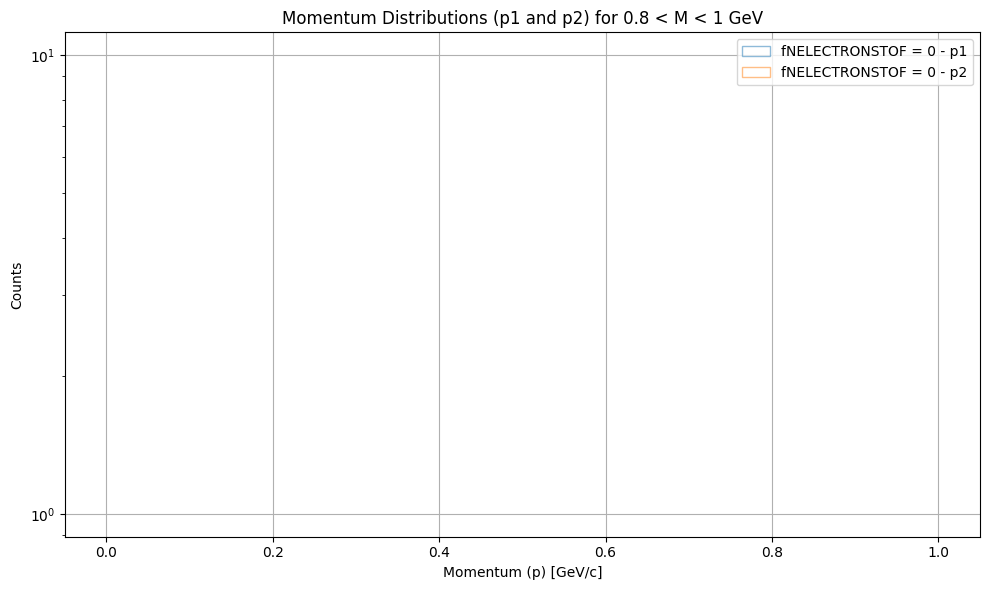

/var/folders/19/v4m73tyd09g0v7jcvl4r6jch0000gn/T/ipykernel_85851/2489325315.py:52: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  plt.yscale("log")


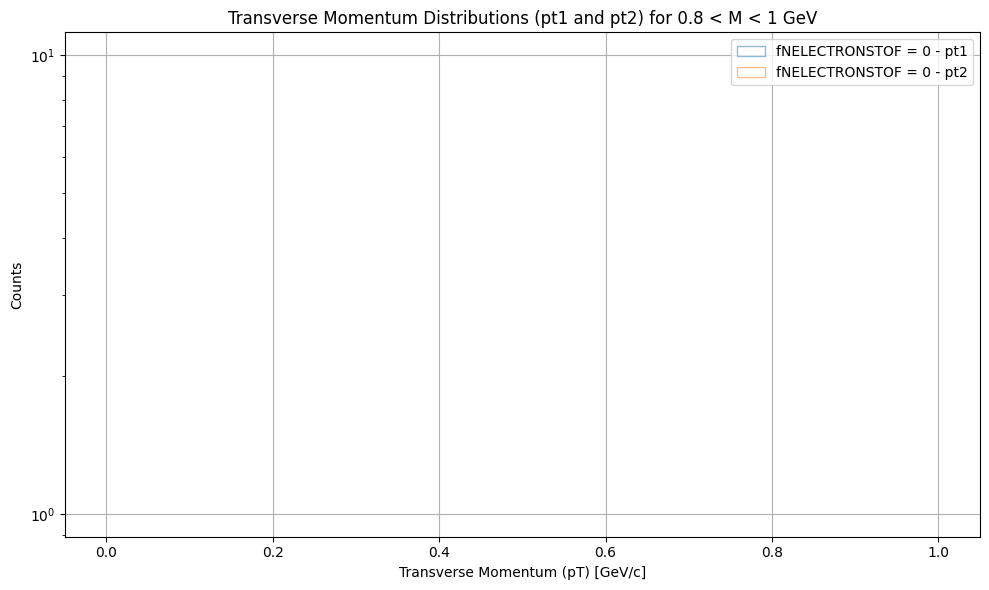

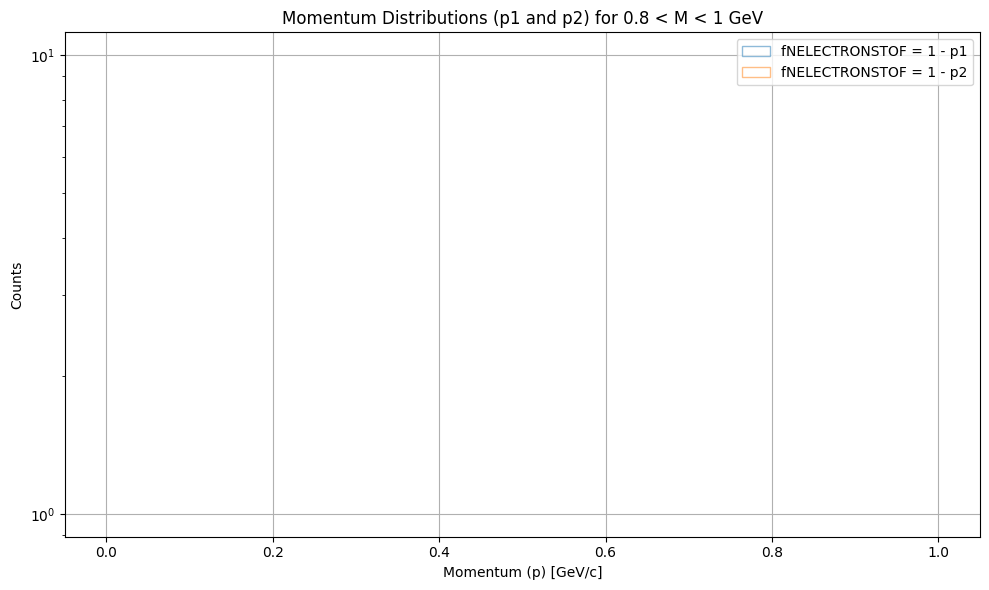

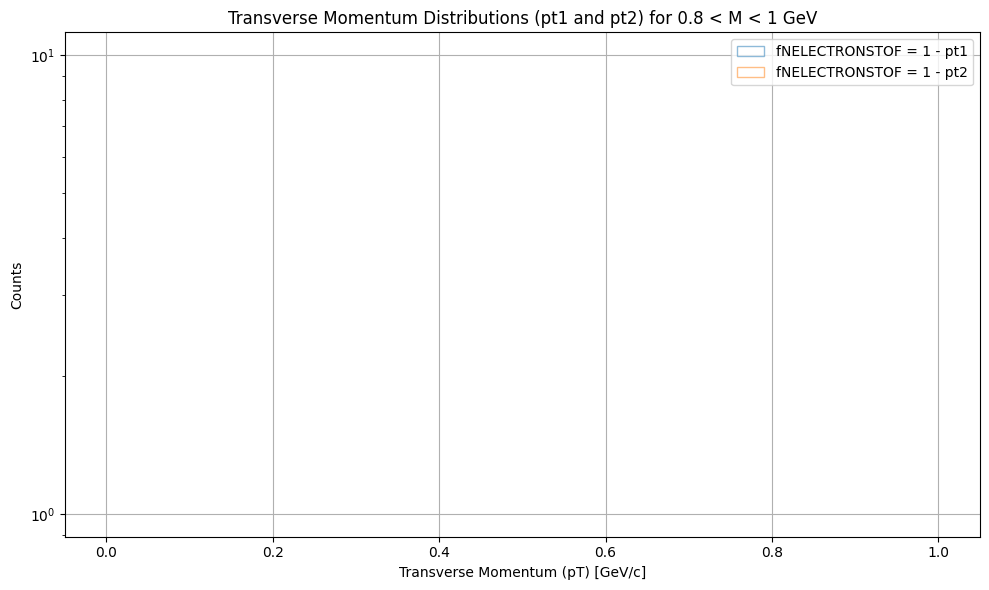

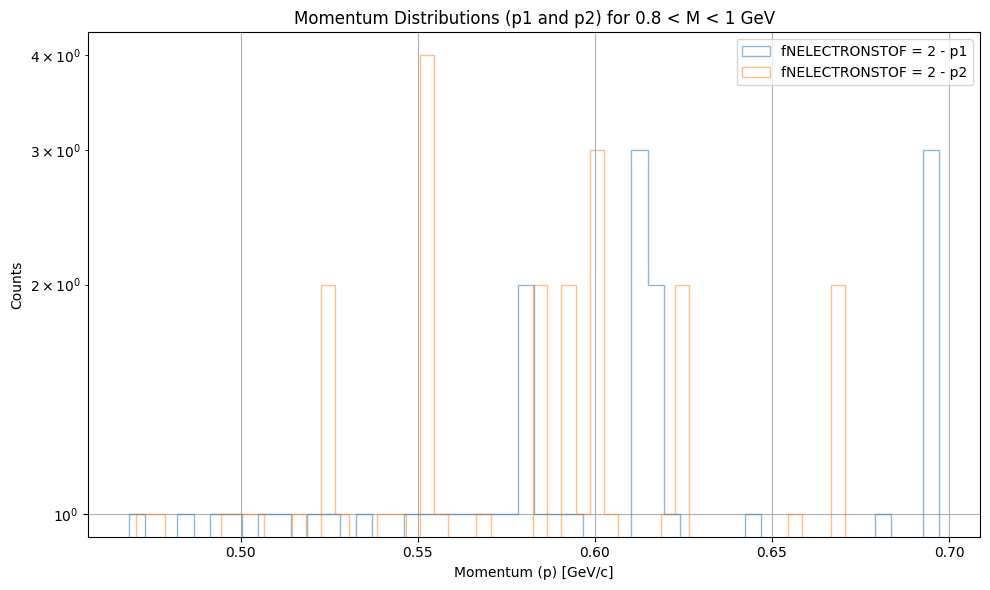

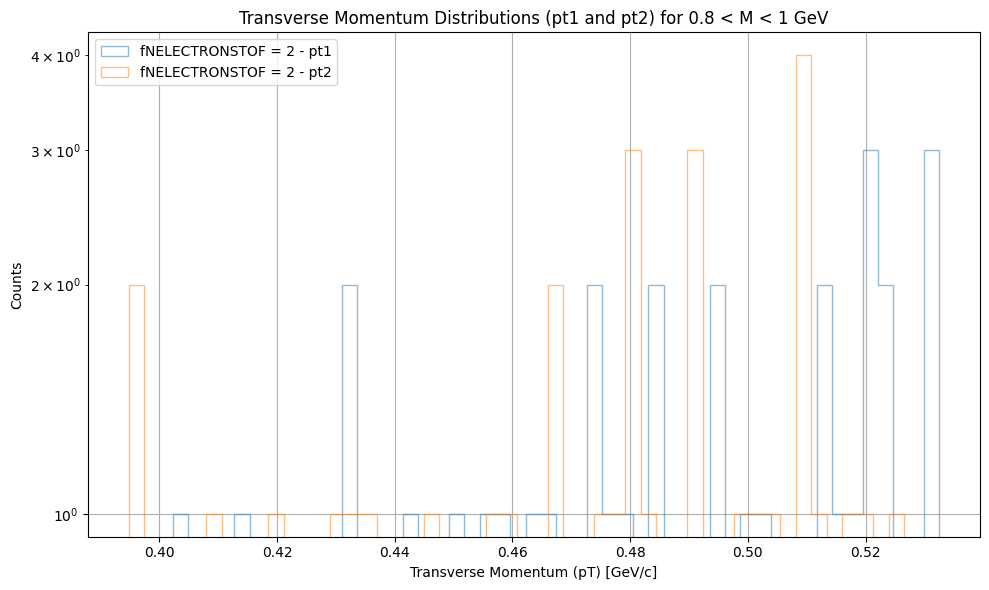

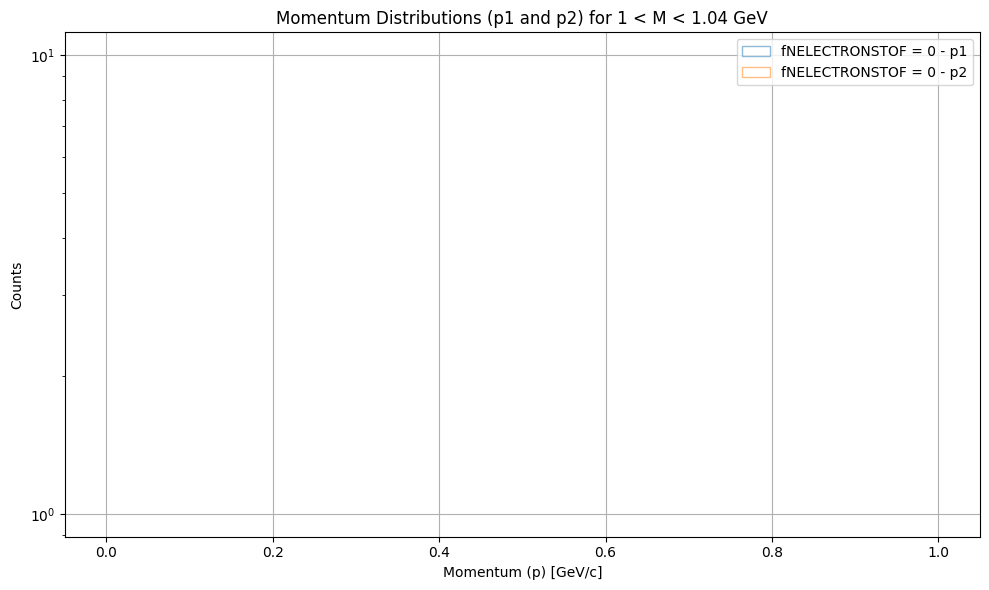

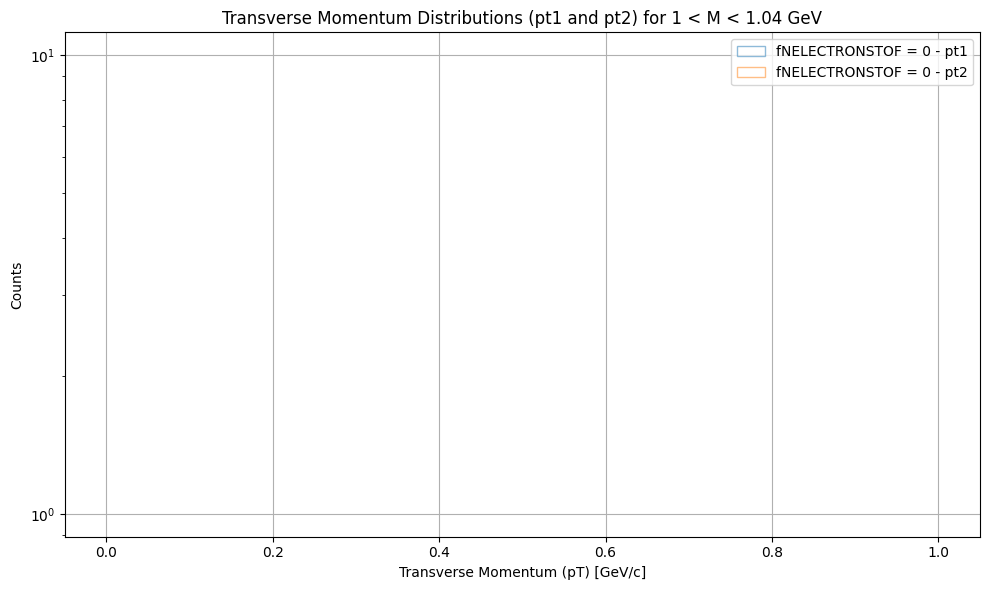

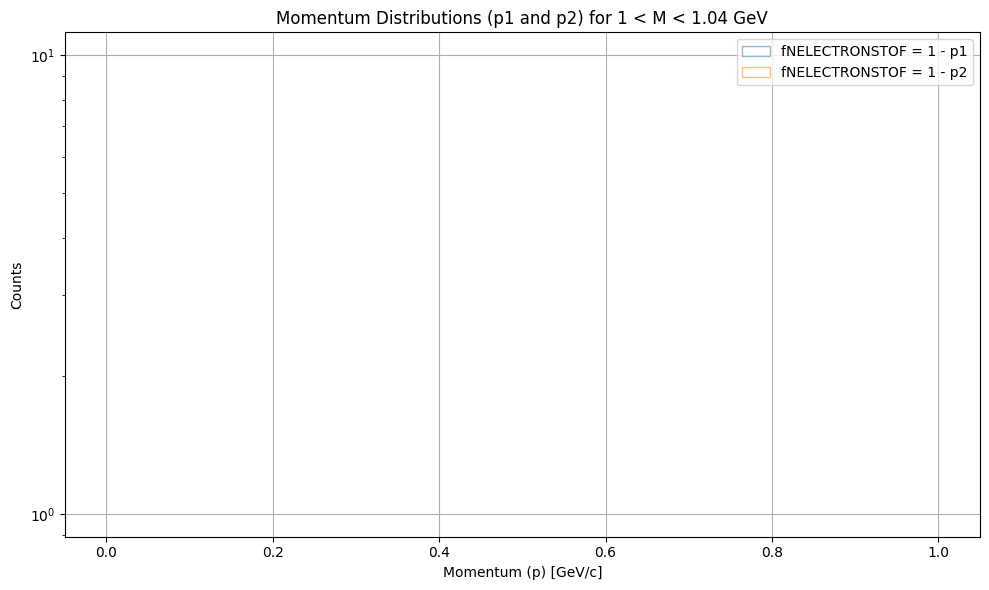

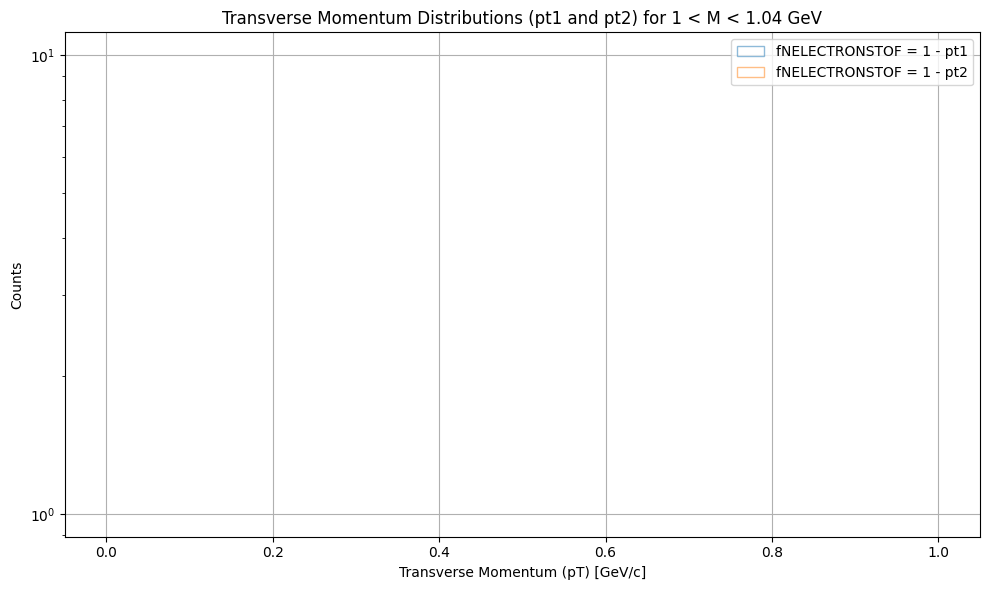

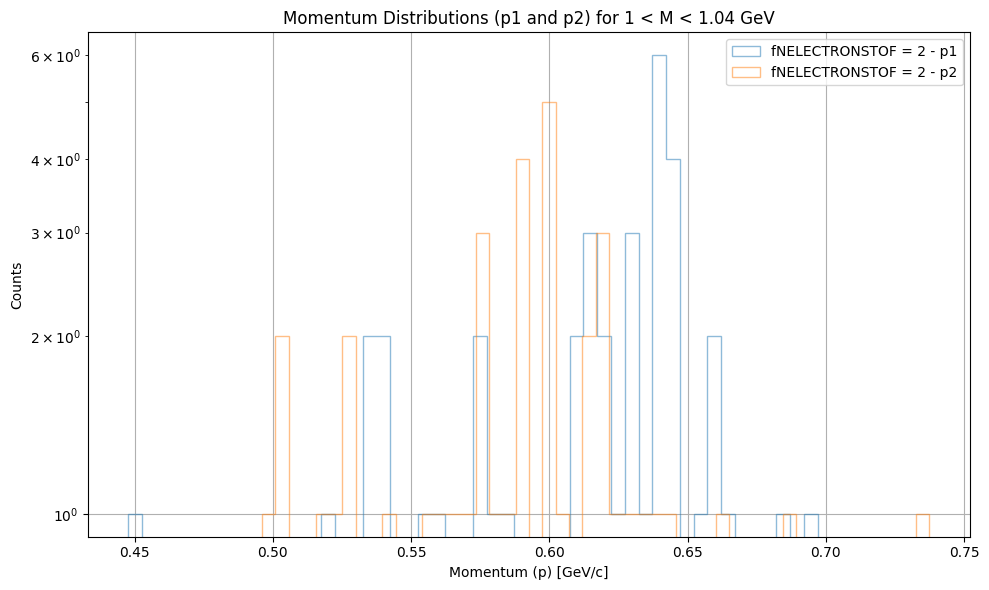

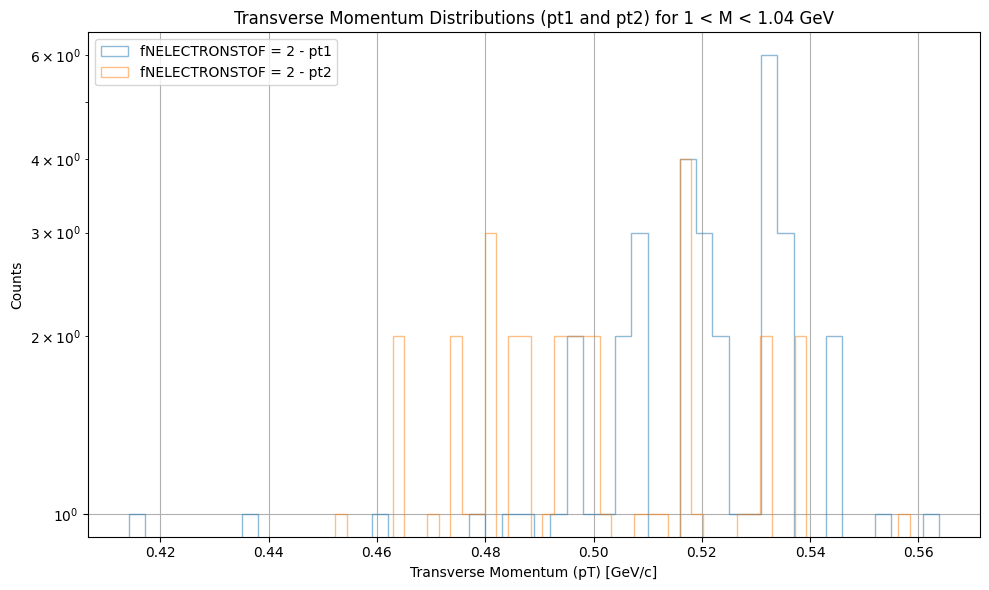

In [28]:
# Add the invariant mass column
add_invariant_mass(df_original_mc)

# Plot the filtered distributions for the two mass ranges
plot_filtered_momenta(df_original_mc, (0.8, 1.0), "for 0.8 < M < 1 GeV")
plot_filtered_momenta(df_original_mc, (1.0, 1.04), "for 1 < M < 1.04 GeV")


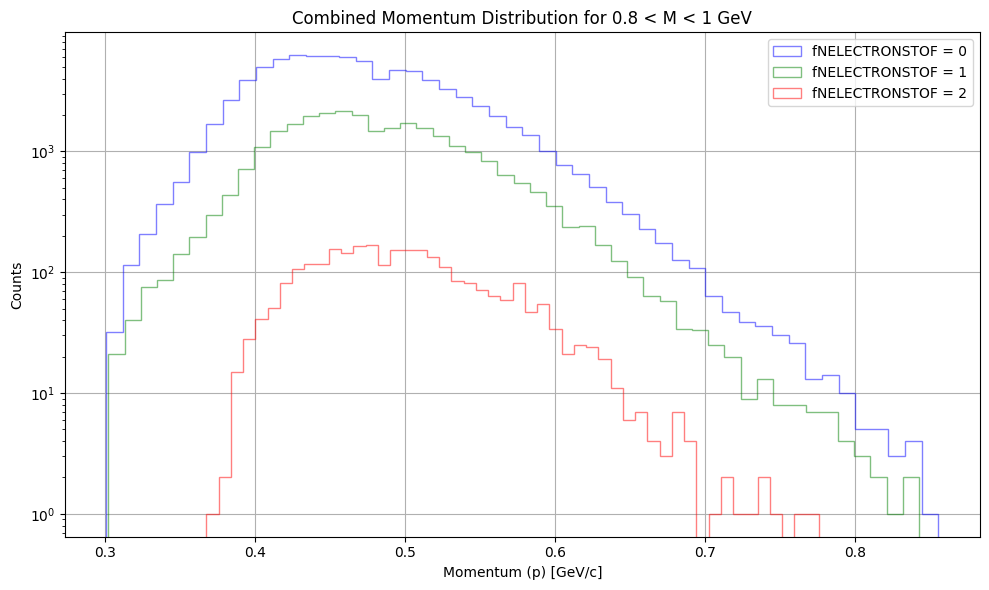

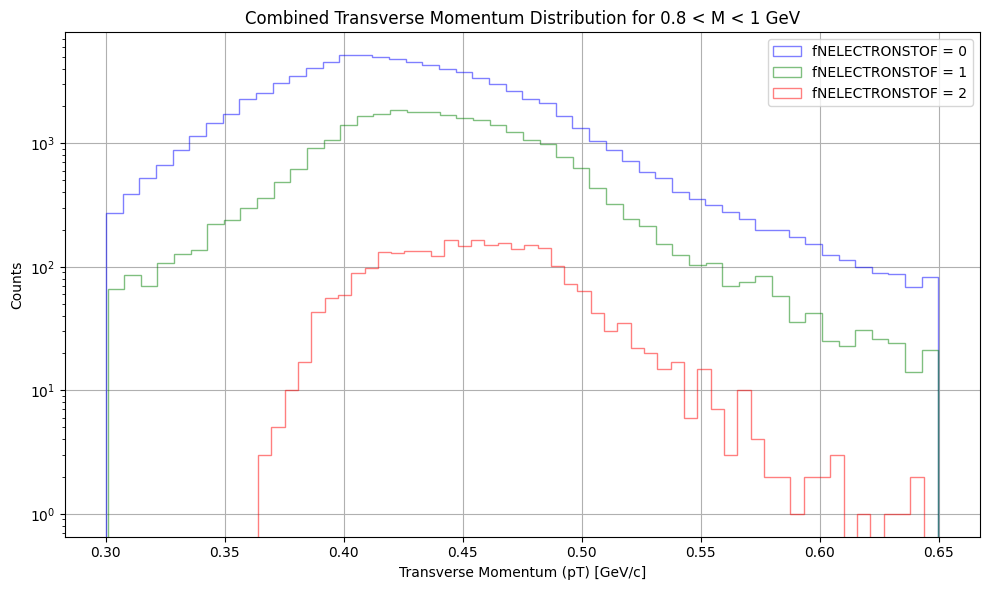

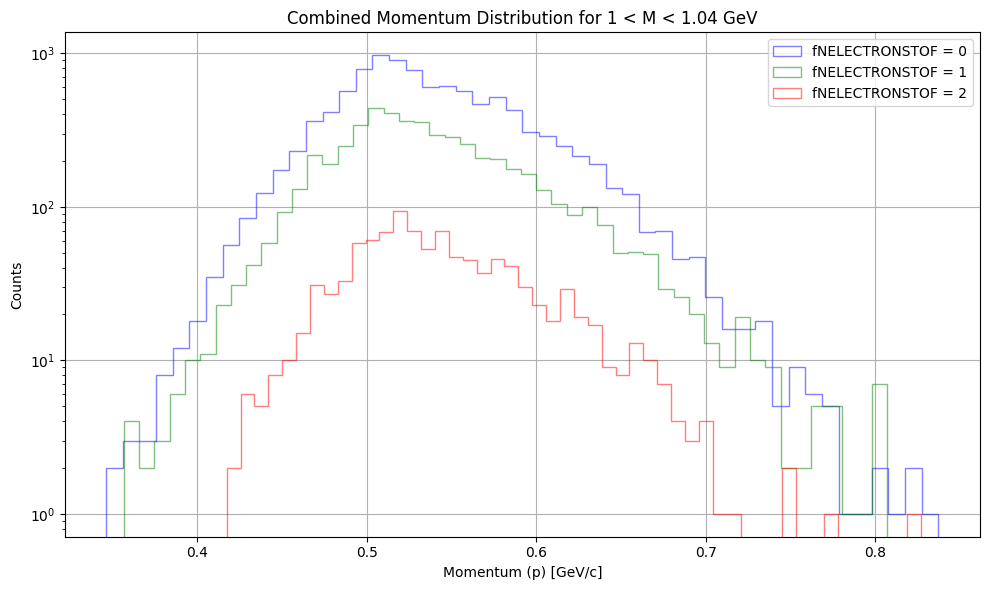

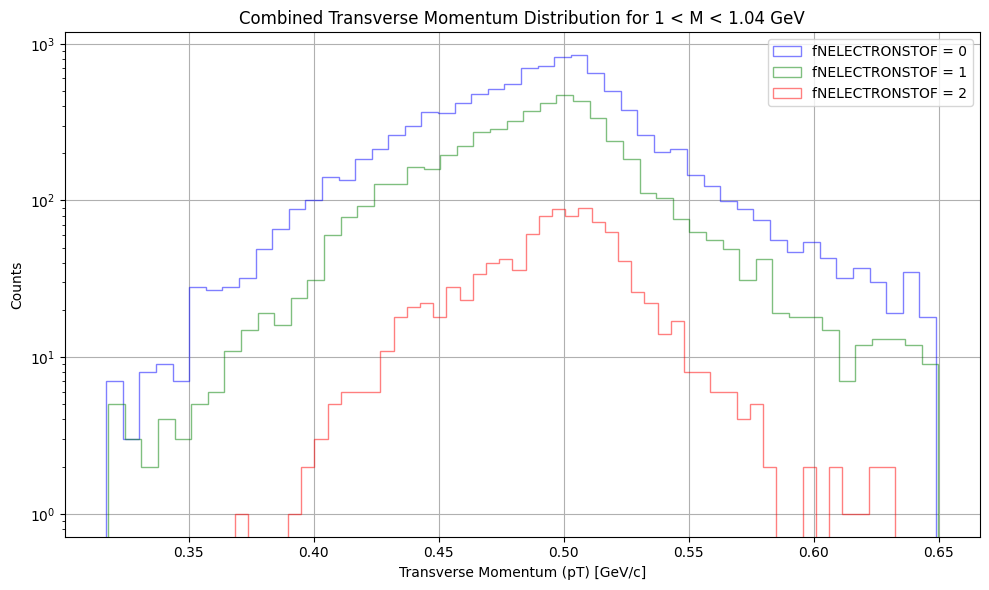

In [29]:
def plot_combined_momenta(dataframes, mass_range, title_suffix, output_folder=None):
    """
    Merges p1 and p2 into p, and pt1 and pt2 into pt, and plots the combined distributions
    for all fNELECTRONSTOF values on the same plots.

    Parameters:
    dataframes (dict): Dictionary of DataFrames, one for each fNELECTRONSTOF value.
    mass_range (tuple): Tuple specifying the invariant mass range (min, max).
    title_suffix (str): Suffix to add to the plot titles for context.
    output_folder (str, optional): Folder to save the plots; if None, plots will be shown interactively.
    """
    mass_min, mass_max = mass_range

    # Colors for the different fNELECTRONSTOF values
    colors = {0: "blue", 1: "green", 2: "red"}

    # Plot merged momentum (p) distributions
    plt.figure(figsize=(10, 6))
    for tof_value, df in dataframes.items():
        # Filter the DataFrame for the specified invariant mass range
        filtered_df = df[(df["M"] > mass_min) & (df["M"] <= mass_max)]

        # Merge p1 and p2 into a single column 'p'
        p = pd.concat([filtered_df["p1"], filtered_df["p2"]])

        # Plot the merged p distribution
        plt.hist(p, bins=50, alpha=0.5, label=f"fNELECTRONSTOF = {tof_value}", histtype="step", color=colors[tof_value])

    plt.yscale("log")
    plt.xlabel("Momentum (p) [GeV/c]")
    plt.ylabel("Counts")
    plt.title(f"Combined Momentum Distribution {title_suffix}")
    plt.legend()
    plt.grid()
    plt.tight_layout()
    if output_folder:
        plt.savefig(f"{output_folder}/combined_momentum_p_{title_suffix.replace(' ', '_')}.pdf")
    else:
        plt.show()

    # Plot merged transverse momentum (pt) distributions
    plt.figure(figsize=(10, 6))
    for tof_value, df in dataframes.items():
        # Filter the DataFrame for the specified invariant mass range
        filtered_df = df[(df["M"] > mass_min) & (df["M"] <= mass_max)]

        # Merge pt1 and pt2 into a single column 'pt'
        pt = pd.concat([filtered_df["pt1"], filtered_df["pt2"]])

        # Plot the merged pt distribution
        plt.hist(pt, bins=50, alpha=0.5, label=f"fNELECTRONSTOF = {tof_value}", histtype="step", color=colors[tof_value])

    plt.yscale("log")
    plt.xlabel("Transverse Momentum (pT) [GeV/c]")
    plt.ylabel("Counts")
    plt.title(f"Combined Transverse Momentum Distribution {title_suffix}")
    plt.legend()
    plt.grid()
    plt.tight_layout()
    if output_folder:
        plt.savefig(f"{output_folder}/combined_transverse_momentum_pt_{title_suffix.replace(' ', '_')}.pdf")
    else:
        plt.show()


# Plot the combined distributions for the two mass ranges
plot_combined_momenta(df_original, (0.8, 1.0), "for 0.8 < M < 1 GeV")
plot_combined_momenta(df_original, (1.0, 1.04), "for 1 < M < 1.04 GeV")


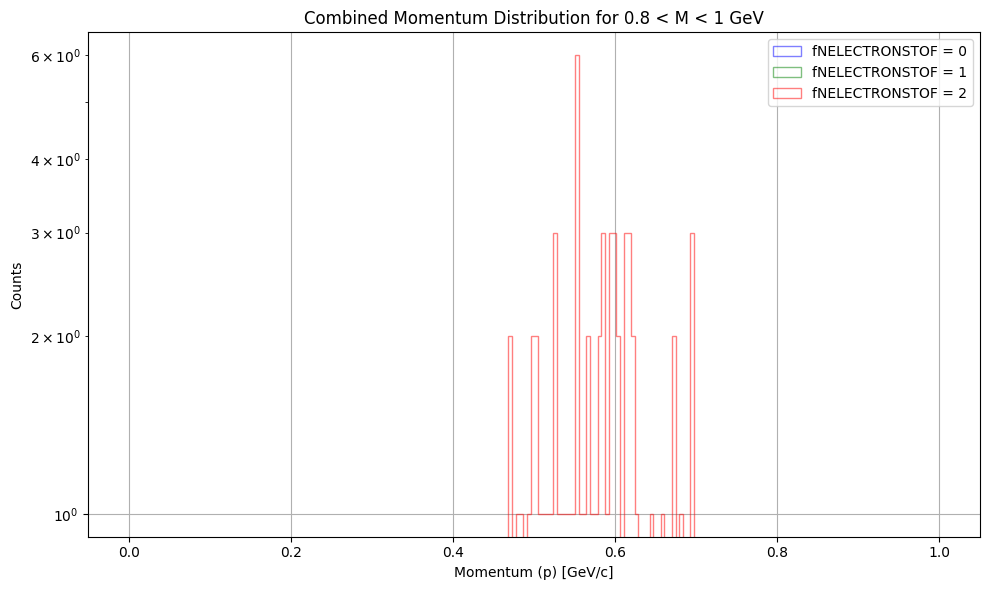

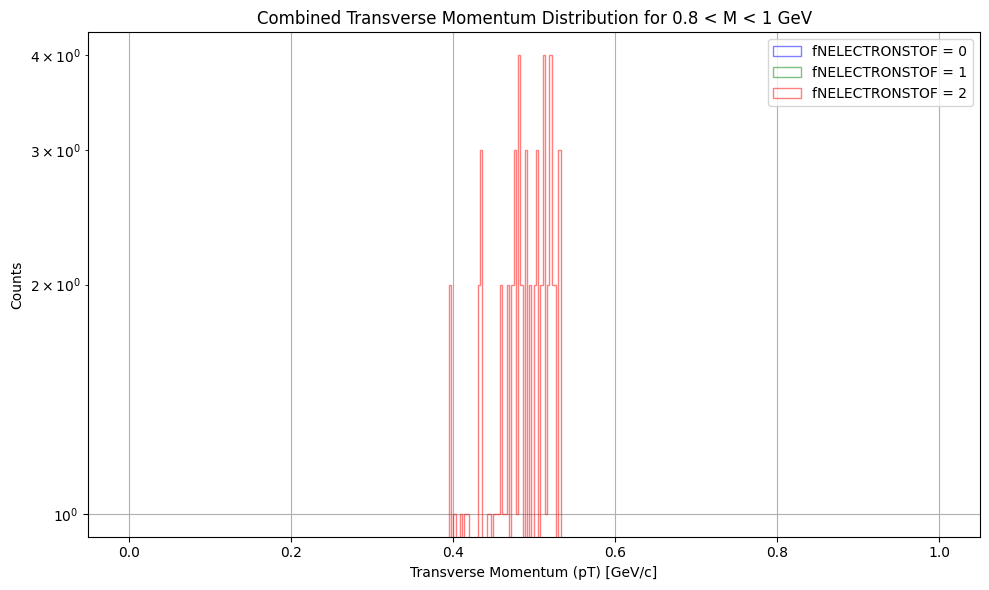

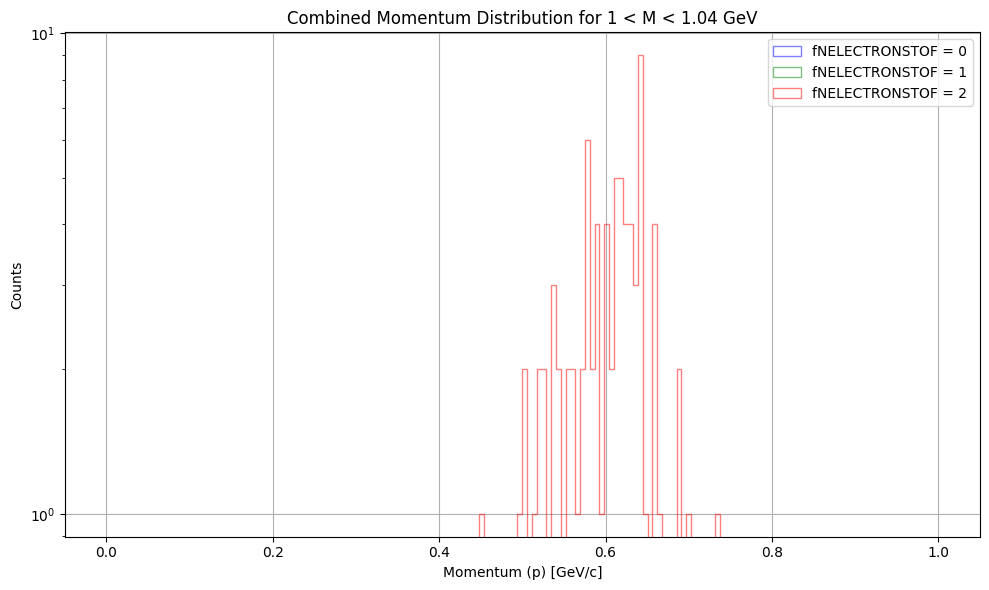

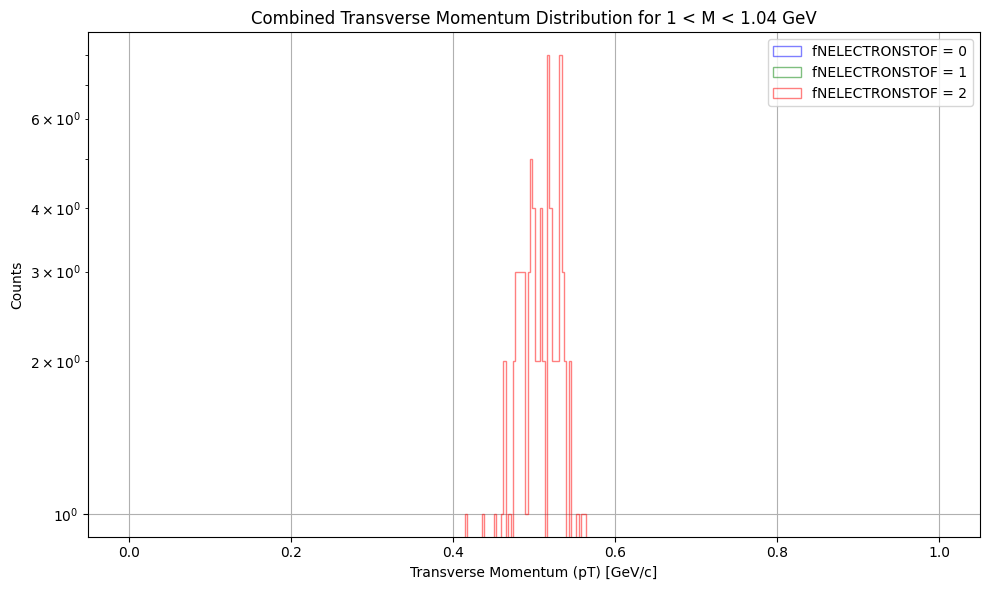

In [30]:
# Plot the combined distributions for the two mass ranges
plot_combined_momenta(df_original_mc, (0.8, 1.0), "for 0.8 < M < 1 GeV")
plot_combined_momenta(df_original_mc, (1.0, 1.04), "for 1 < M < 1.04 GeV")


In [31]:
def add_combined_4vector_momenta_and_norm(dataframes):
    """
    Adds `p` (momentum magnitude), `pt` (transverse momentum), and `norm` (4-vector norm) columns
    to the input DataFrames by summing the 4-vectors of the two tracks in each event.

    Parameters:
    dataframes (dict): Dictionary of DataFrames, one for each `fNELECTRONSTOF` value.
    """
    for tof_value, df in dataframes.items():
        # Calculate combined px, py, pz, and energy
        combined_px = df["fPX1"] + df["fPX2"]
        combined_py = df["fPY1"] + df["fPY2"]
        combined_pz = df["fPZ1"] + df["fPZ2"]
        combined_energy = df["fPE1"] + df["fPE2"]

        # Compute p (momentum magnitude)
        df["p"] = np.sqrt(combined_px**2 + combined_py**2 + combined_pz**2)
        
        # Compute pt (transverse momentum)
        df["pt"] = np.sqrt(combined_px**2 + combined_py**2)
        
        # Compute norm of the 4-vector
        df["norm"] = np.sqrt(combined_energy**2 - (combined_px**2 + combined_py**2 + combined_pz**2))
        
        # Update the DataFrame in the dictionary
        dataframes[tof_value] = df

    print("Added `p`, `pt`, and `norm` columns to all DataFrames.")

# Example usage:
add_combined_4vector_momenta_and_norm(df_original)
add_combined_4vector_momenta_and_norm(df_original_mc)

# Verify the updated DataFrames
for tof_value, subset_df in df_original.items():
    print(f"\nDataFrame for fNELECTRONSTOF = {tof_value}:")
    print(subset_df[["p", "pt", "norm"]].head())


Added `p`, `pt`, and `norm` columns to all DataFrames.
Added `p`, `pt`, and `norm` columns to all DataFrames.

DataFrame for fNELECTRONSTOF = 0:
          p        pt      norm
0  0.081730  0.015648  1.044145
1  0.301845  0.021267  0.675507
3  0.503370  0.014267  1.002446
4  0.186608  0.010298  0.847201
6  0.629309  0.050420  1.208328

DataFrame for fNELECTRONSTOF = 1:
           p        pt      norm
2   0.140921  0.078425  1.110052
5   0.302387  0.032446  0.949829
7   0.256355  0.049433  1.029289
9   0.345060  0.017806  0.861869
15  0.211650  0.046951  0.768541

DataFrame for fNELECTRONSTOF = 2:
            p        pt      norm
80   0.596011  0.029597  1.131893
97   0.371508  0.006239  1.375473
187  0.690001  0.012639  1.093112
190  0.541534  0.012132  0.949757
235  0.339143  0.083631  1.060526


In [32]:
df_original[2].head()

,fPX1,fPY1,fPZ1,fPE1,fPX2,fPY2,fPZ2,fPE2,fNCOUNTERPV,p1,p2,pt1,pt2,M,p,pt,norm
80,-0.495379,0.182227,0.107824,0.538733,0.522859,-0.193218,0.487452,0.740489,2,0.538733,0.740489,0.527833,0.557418,1.131893,0.596011,0.029597,1.131893
97,0.362124,-0.528337,0.066572,0.643976,-0.367282,0.531846,-0.438028,0.780785,2,0.643976,0.780785,0.640526,0.646341,1.375473,0.371508,0.006239,1.375473
187,0.504183,-0.186353,0.406544,0.673948,-0.515286,0.192391,0.283341,0.618722,2,0.673948,0.618722,0.537520,0.550031,1.093112,0.690001,0.012639,1.093112
190,-0.061697,0.461395,-0.176633,0.497887,0.073327,-0.464846,-0.364765,0.595409,2,0.497886,0.595409,0.465501,0.470594,0.949757,0.541534,0.012132,0.949757
235,0.479244,0.102835,0.125527,0.505972,-0.562857,-0.104567,0.203143,0.607462,2,0.505972,0.607462,0.490153,0.572488,1.060526,0.339143,0.083631,1.060526


In [33]:
df_original_mc[2].head()

,fPX1,fPY1,fPZ1,fPE1,fPX2,fPY2,fPZ2,fPE2,fNCOUNTERPV,p1,p2,pt1,pt2,M,p,pt,norm
0,-0.444814,-0.111282,0.095485,0.468360,0.410228,0.131580,-0.189227,0.470540,2,0.468359,0.470539,0.458523,0.430814,0.933347,0.101960,0.040103,0.933347
1,-0.046926,-0.411486,0.169953,0.447669,0.062477,0.458947,-0.345003,0.577549,2,0.447669,0.577549,0.414154,0.463180,1.008928,0.182035,0.049943,1.008928
2,-0.232329,0.466674,-0.324831,0.614229,0.172748,-0.371504,-0.289023,0.501389,2,0.614229,0.501389,0.521308,0.409703,0.924759,0.624038,0.112283,0.924759
3,0.181233,-0.425218,0.312274,0.557827,-0.260428,0.439112,0.434741,0.670553,2,0.557827,0.670553,0.462229,0.510531,0.971814,0.751329,0.080404,0.971814
4,-0.398112,-0.351700,0.354662,0.638727,0.363641,0.324934,0.199371,0.526845,2,0.638726,0.526845,0.531212,0.487665,1.024549,0.555750,0.043643,1.024549


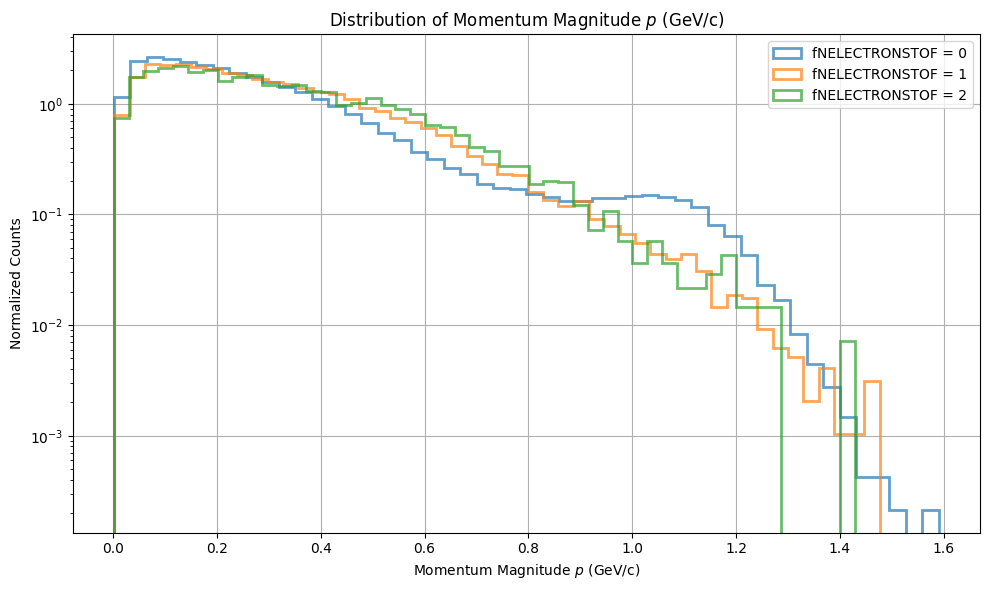

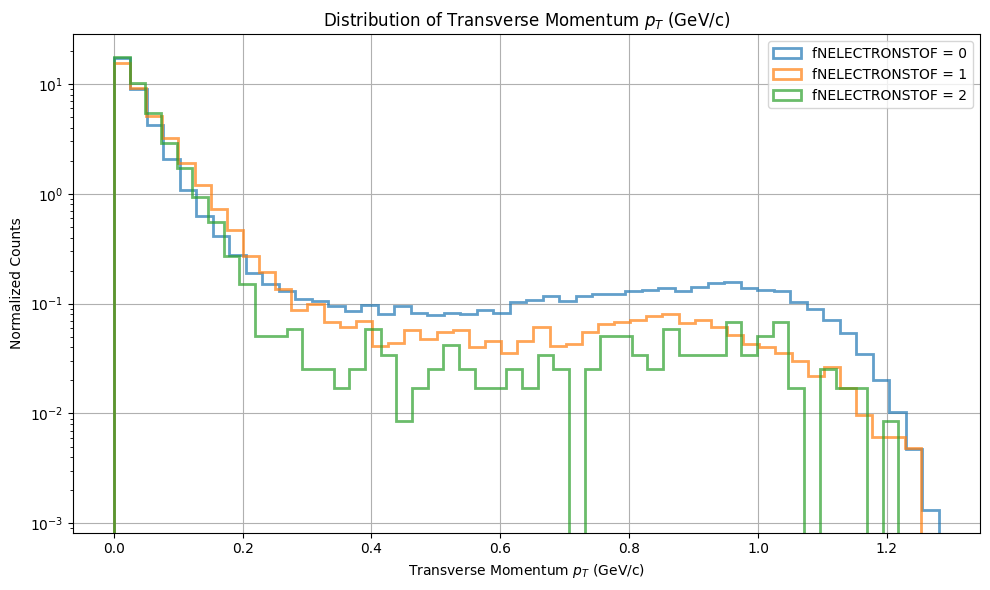

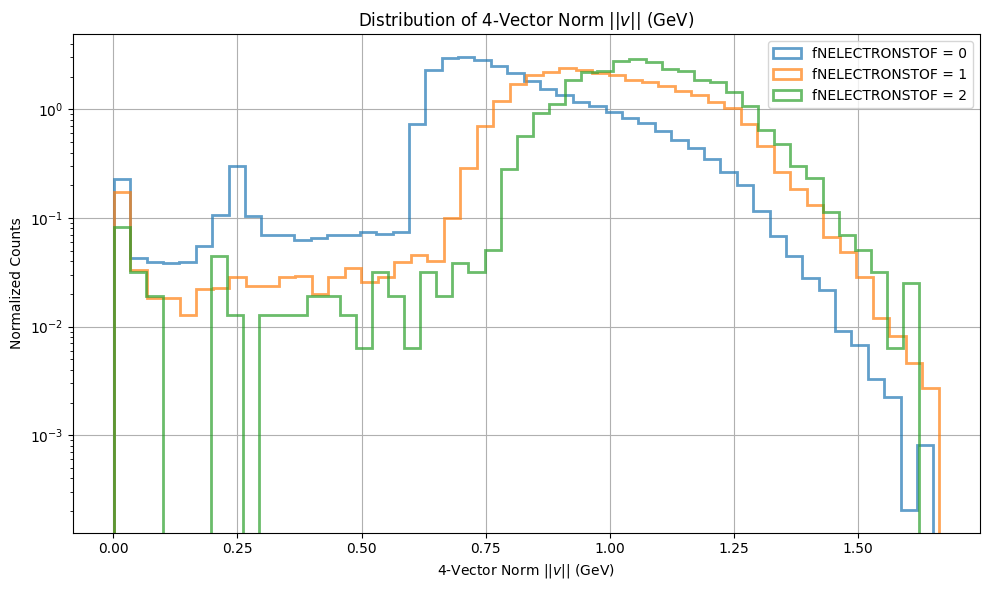

/Users/simoneragoni/software/venv-HIVE/lib/python3.12/site-packages/numpy/lib/histograms.py:885: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges


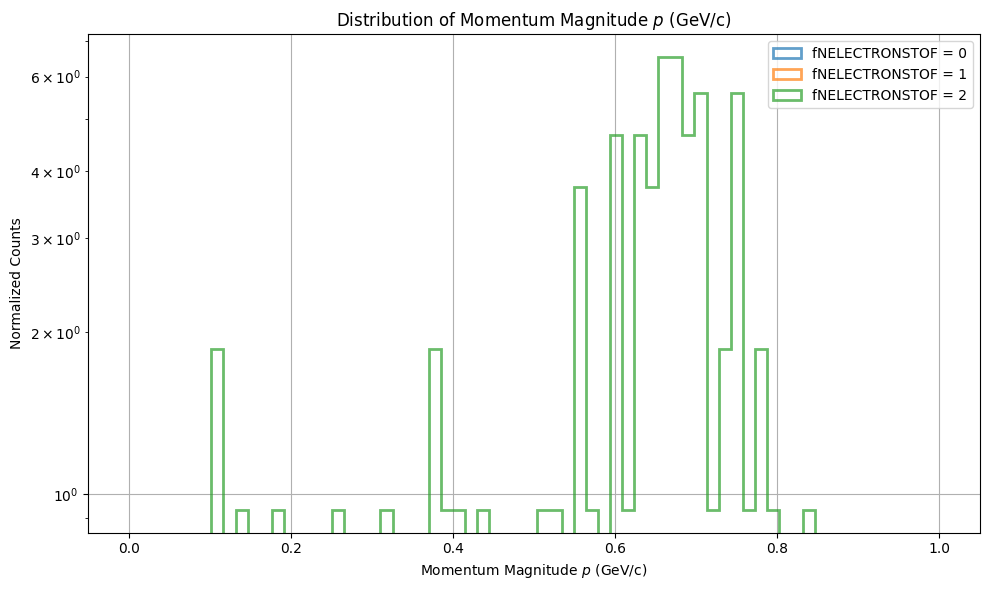

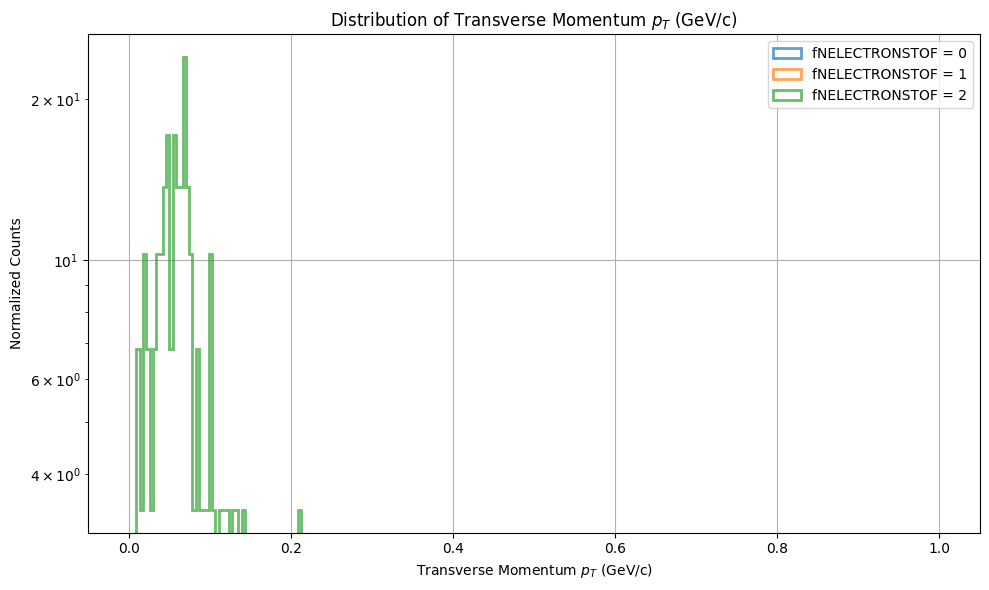

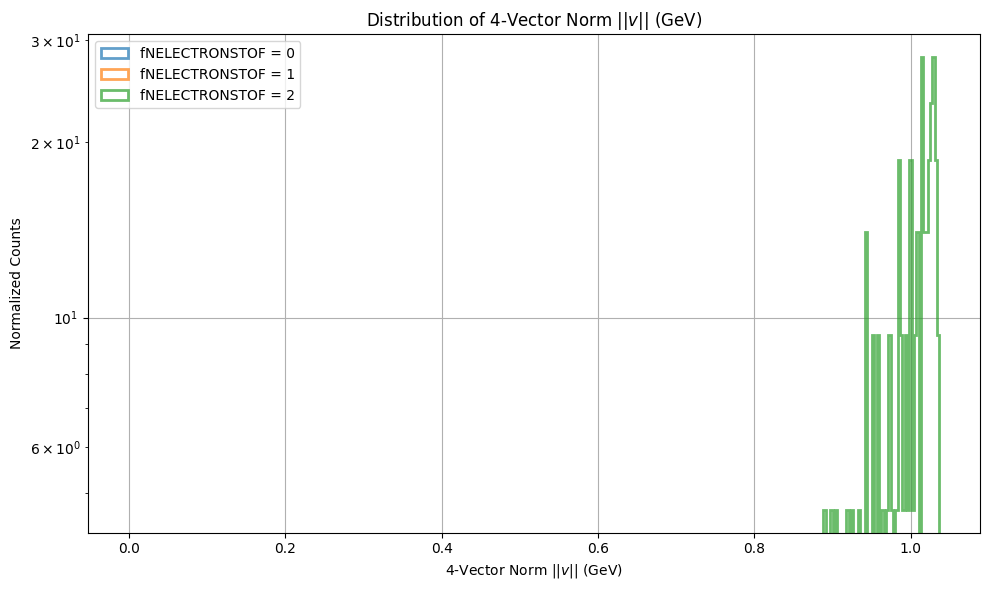

In [34]:
def plot_combined_momenta_and_norm(dataframes):
    """
    Plots the distributions of `p`, `pt`, and `norm` for the three `fNELECTRONSTOF` DataFrames on the same plots.
    The plots are displayed directly instead of being saved.
    
    Parameters:
    dataframes (dict): Dictionary of DataFrames with keys 0, 1, 2 representing `fNELECTRONSTOF`.
    """
    # Define the columns to plot and their labels
    columns_to_plot = {
        "p": "Momentum Magnitude $p$ (GeV/c)",
        "pt": "Transverse Momentum $p_T$ (GeV/c)",
        "norm": "4-Vector Norm $||v||$ (GeV)"
    }

    for column, xlabel in columns_to_plot.items():
        plt.figure(figsize=(10, 6))

        for tof_value, df in dataframes.items():
            plt.hist(
                df[column],
                bins=50,
                alpha=0.7,
                label=f"fNELECTRONSTOF = {tof_value}",
                density=True,  # Normalize the histograms
                histtype="step",
                linewidth=2
            )

        # Add labels and legend
        plt.xlabel(xlabel)
        plt.ylabel("Normalized Counts")
        plt.title(f"Distribution of {xlabel}")
        plt.yscale("log")  # Set y-axis to log scale
        plt.legend()
        plt.grid()
        plt.tight_layout()

        # Show the plot directly
        plt.show()

# Example usage:
plot_combined_momenta_and_norm(df_original)
plot_combined_momenta_and_norm(df_original_mc)


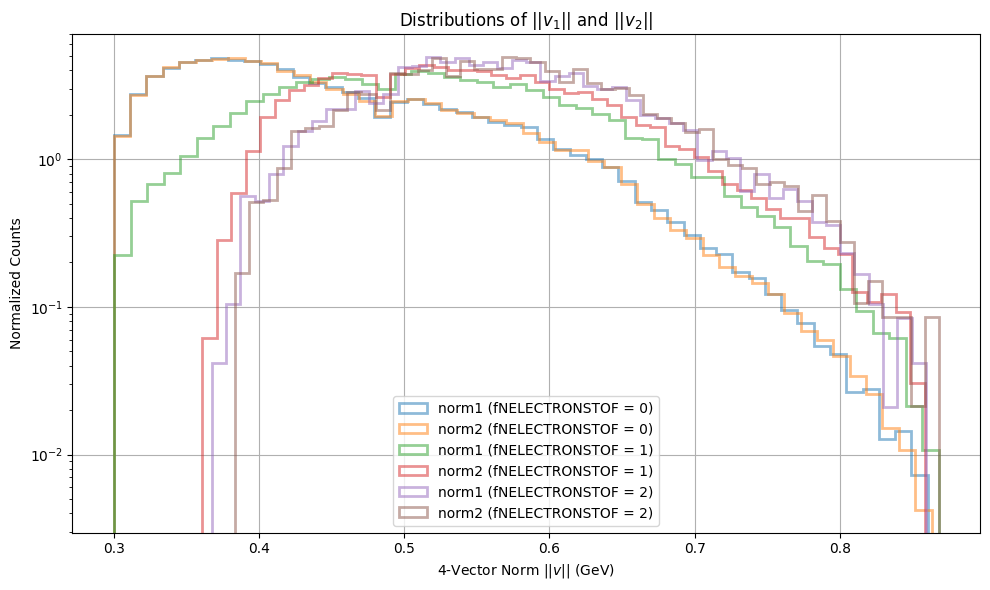

In [35]:
def add_norm1_norm2(dataframes):
    """
    Adds the columns `norm1` and `norm2` to the DataFrames in the input dictionary.
    
    Parameters:
    dataframes (dict): Dictionary of DataFrames with keys 0, 1, 2 representing `fNELECTRONSTOF`.
    """
    for tof_value, df in dataframes.items():
        # Compute norm1 and norm2
        # df["norm1"] = np.sqrt(df["fPE1"]**2 - (df["fPX1"]**2 + df["fPY1"]**2 + df["fPZ1"]**2))
        # df["norm2"] = np.sqrt(df["fPE2"]**2 - (df["fPX2"]**2 + df["fPY2"]**2 + df["fPZ2"]**2))
        df["norm1"] = np.sqrt(df["fPX1"]**2 + df["fPY1"]**2 + df["fPZ1"]**2)
        df["norm2"] = np.sqrt(df["fPX2"]**2 + df["fPY2"]**2 + df["fPZ2"]**2)

def plot_norm1_norm2(dataframes):
    """
    Plots the distributions of `norm1` and `norm2` on the same plot with separate curves
    for `fNELECTRONSTOF = 0, 1, 2`.
    
    Parameters:
    dataframes (dict): Dictionary of DataFrames with keys 0, 1, 2 representing `fNELECTRONSTOF`.
    """
    plt.figure(figsize=(10, 6))

    for tof_value, df in dataframes.items():
        # Plot norm1
        plt.hist(
            df["norm1"],
            bins=50,
            alpha=0.5,
            label=f"norm1 (fNELECTRONSTOF = {tof_value})",
            density=True,  # Normalize the histograms
            histtype="step",
            linewidth=2
        )

        # Plot norm2
        plt.hist(
            df["norm2"],
            bins=50,
            alpha=0.5,
            label=f"norm2 (fNELECTRONSTOF = {tof_value})",
            density=True,  # Normalize the histograms
            histtype="step",
            linewidth=2
        )

    # Add labels and legend
    plt.xlabel("4-Vector Norm $||v||$ (GeV)")
    plt.ylabel("Normalized Counts")
    plt.title("Distributions of $||v_1||$ and $||v_2||$")
    plt.yscale("log")  # Set y-axis to log scale
    plt.legend()
    plt.grid()
    plt.tight_layout()

    # Show the plot directly
    plt.show()

# Add norm1 and norm2 to the DataFrames
add_norm1_norm2(df_original)
add_norm1_norm2(df_original_mc)

# Plot norm1 and norm2
plot_norm1_norm2(df_original)


In [36]:
df_original[2].head()

,fPX1,fPY1,fPZ1,fPE1,fPX2,fPY2,fPZ2,fPE2,fNCOUNTERPV,p1,p2,pt1,pt2,M,p,pt,norm,norm1,norm2
80,-0.495379,0.182227,0.107824,0.538733,0.522859,-0.193218,0.487452,0.740489,2,0.538733,0.740489,0.527833,0.557418,1.131893,0.596011,0.029597,1.131893,0.538733,0.740489
97,0.362124,-0.528337,0.066572,0.643976,-0.367282,0.531846,-0.438028,0.780785,2,0.643976,0.780785,0.640526,0.646341,1.375473,0.371508,0.006239,1.375473,0.643976,0.780785
187,0.504183,-0.186353,0.406544,0.673948,-0.515286,0.192391,0.283341,0.618722,2,0.673948,0.618722,0.537520,0.550031,1.093112,0.690001,0.012639,1.093112,0.673948,0.618722
190,-0.061697,0.461395,-0.176633,0.497887,0.073327,-0.464846,-0.364765,0.595409,2,0.497886,0.595409,0.465501,0.470594,0.949757,0.541534,0.012132,0.949757,0.497886,0.595409
235,0.479244,0.102835,0.125527,0.505972,-0.562857,-0.104567,0.203143,0.607462,2,0.505972,0.607462,0.490153,0.572488,1.060526,0.339143,0.083631,1.060526,0.505972,0.607462


In [37]:
def create_filtered_dataframes(dataframes):
    """
    Creates six filtered DataFrames (two for each original DataFrame) based on invariant mass and
    kinematic conditions.

    Parameters:
    dataframes (dict): Dictionary of DataFrames with keys 0, 1, 2 representing `fNELECTRONSTOF`.

    Returns:
    dict: Dictionary containing six filtered DataFrames with keys
          `df_filtered_lower[0,1,2]` and `df_filtered_phi[0,1,2]`.
    """
    df_filtered_lower = []
    df_filtered_phi = []

    # Loop through each fNELECTRONSTOF value
    for tof_value, df in dataframes.items():
        # Define the conditions
        mass_condition_lower = (0.8 < df["M"]) & (df["M"] < 0.95)
        mass_condition_phi = (0.95 < df["M"]) & (df["M"] < 1.08)
        pt_condition = (0.42 < df["pt1"]) & (df["pt1"] < 0.55) & \
                       (0.42 < df["pt2"]) & (df["pt2"] < 0.55)
        p_condition = (0.47 < df["p1"]) & (df["p1"] < 0.61) & \
                      (0.47 < df["p2"]) & (df["p2"] < 0.61)

        # Filtered by lower mass condition and kinematic conditions
        df_lower = df[mass_condition_lower & pt_condition & p_condition]
        df_filtered_lower.append(df_lower)

        # Filtered by phi mass condition and kinematic conditions
        df_phi = df[mass_condition_phi & pt_condition & p_condition]
        df_filtered_phi.append(df_phi)

    return df_filtered_lower, df_filtered_phi

# Create the filtered DataFrames
df_filtered_lower, df_filtered_phi = create_filtered_dataframes(df_original)
df_filtered_lower_mc, df_filtered_phi_mc = create_filtered_dataframes(df_original_mc)


In [ ]:
df_filtered_phi[0].head()

,fPX1,fPY1,fPZ1,fPE1,fPX2,fPY2,fPZ2,fPE2,fNCOUNTERPV,p1,p2,pt1,pt2,M,p,pt,norm,norm1,norm2
0,0.380054,-0.298258,0.218900,0.530393,-0.394773,0.303569,-0.138682,0.516946,2,0.530393,0.516946,0.483114,0.497996,1.044145,0.081730,0.015648,1.044145,0.530393,0.516946
3,-0.490760,-0.127637,-0.275347,0.577020,0.477005,0.131425,-0.227821,0.544710,2,0.577020,0.544709,0.507086,0.494779,1.002446,0.503370,0.014267,1.002446,0.577020,0.544709
21,0.307177,0.377516,0.072478,0.492066,-0.335084,-0.324916,-0.256377,0.532524,2,0.492066,0.532524,0.486699,0.466746,1.006191,0.193299,0.059545,1.006191,0.492066,0.532524
26,-0.173710,-0.432466,0.249971,0.528855,0.181690,0.432205,-0.234149,0.524060,2,0.528855,0.524059,0.466049,0.468842,1.052765,0.017723,0.007984,1.052765,0.528855,0.524059
52,0.379965,0.303154,-0.058889,0.489636,-0.334194,-0.332120,-0.061950,0.475213,2,0.489636,0.475213,0.486082,0.471157,0.955719,0.132424,0.054166,0.955719,0.489636,0.475213


In [ ]:
df_filtered_lower[0].head()

,fPX1,fPY1,fPZ1,fPE1,fPX2,fPY2,fPZ2,fPE2,fNCOUNTERPV,p1,p2,pt1,pt2,M,p,pt,norm,norm1,norm2
208,-0.344338,0.299502,0.357128,0.579492,0.320247,-0.274716,0.309496,0.523273,2,0.579492,0.523273,0.456366,0.421932,0.877786,0.667519,0.034565,0.877786,0.579492,0.523273
219,-0.048646,-0.494320,-0.268802,0.564777,0.426420,0.219069,0.126229,0.495741,2,0.564777,0.495741,0.496708,0.479401,0.941220,0.488676,0.467415,0.941220,0.564777,0.495741
265,-0.271469,-0.374878,-0.353647,0.582490,0.320376,0.343247,-0.264297,0.538806,2,0.582490,0.538806,0.462848,0.469531,0.933841,0.620683,0.058244,0.933841,0.582490,0.538806
290,0.412916,-0.179455,-0.261675,0.520748,-0.427634,0.184280,-0.233429,0.520884,2,0.520747,0.520883,0.450227,0.465650,0.916312,0.495346,0.015489,0.916312,0.520747,0.520883
335,0.299854,0.388972,-0.194577,0.528273,-0.256161,-0.336580,-0.289689,0.512665,2,0.528273,0.512664,0.491133,0.422972,0.918904,0.489048,0.068220,0.918904,0.528273,0.512664


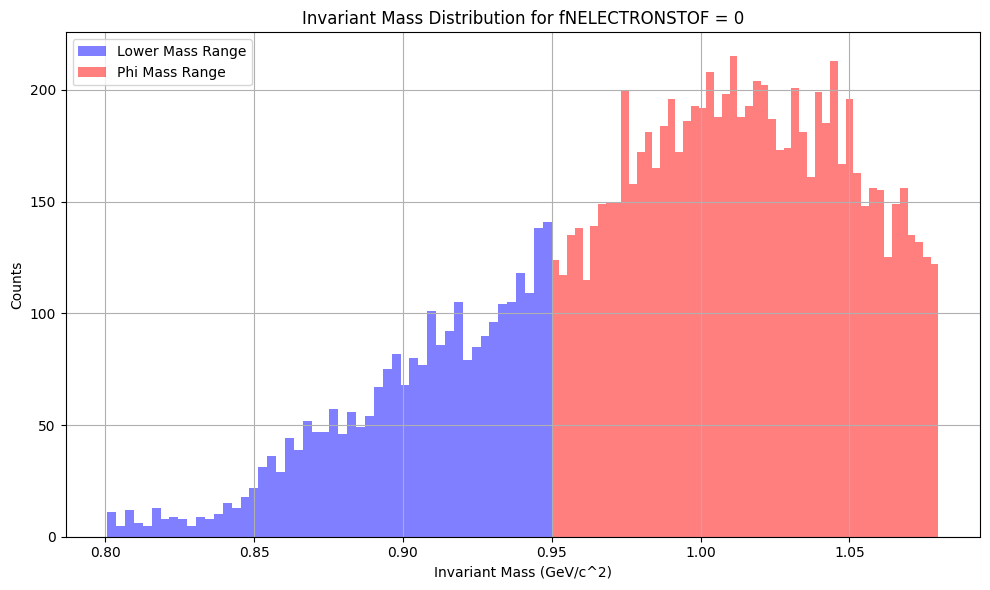

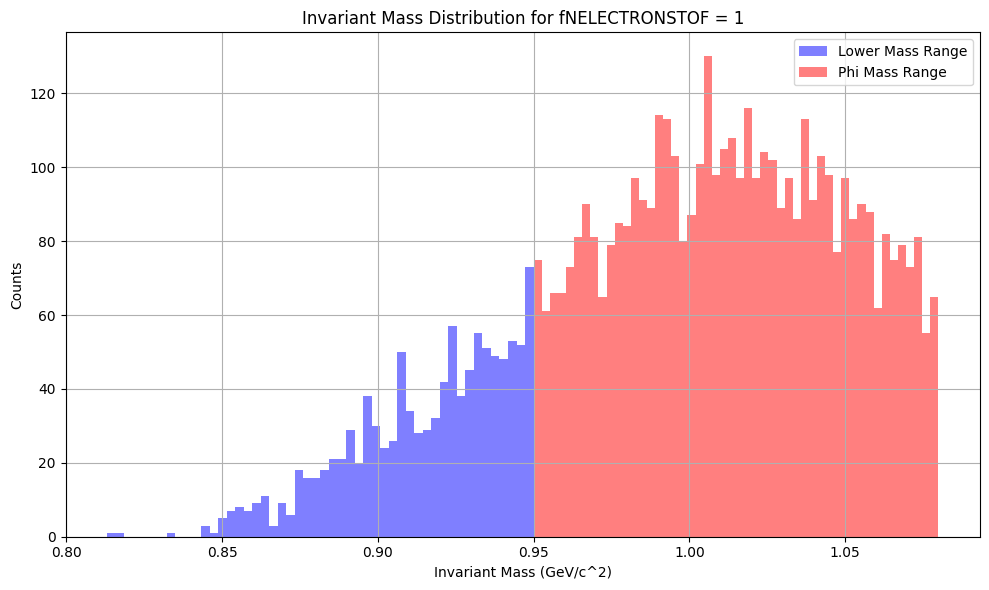

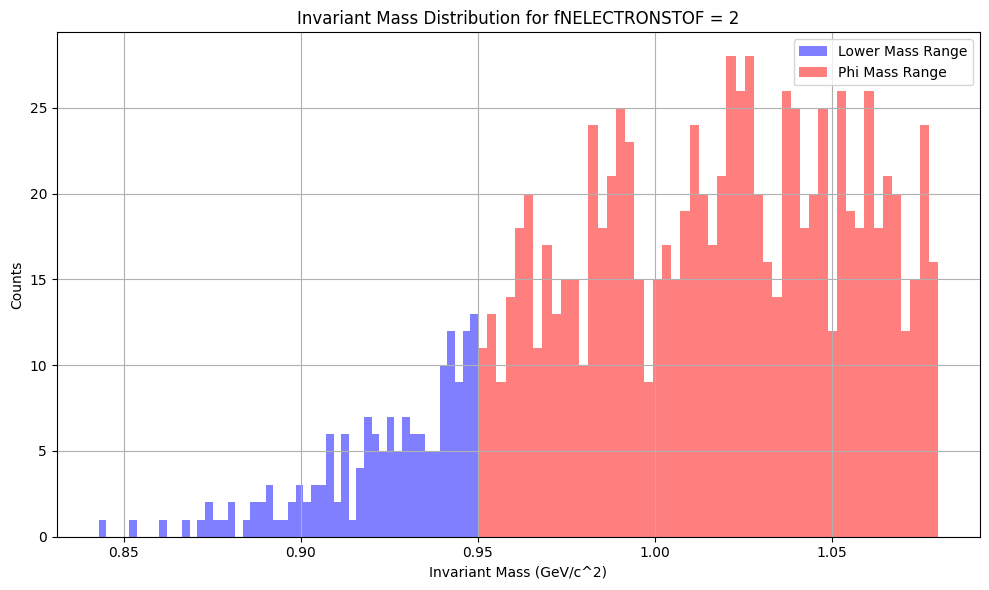

In [38]:
import matplotlib.pyplot as plt

# Function to plot invariant mass distributions
def plot_invariant_mass_distributions(filtered_lower, filtered_phi):
    """
    Plots the invariant mass distributions for the lower and phi mass ranges
    for fNELECTRONSTOF = 0, 1, and 2.

    Parameters:
    filtered_lower (list): List of DataFrames for the lower mass range.
    filtered_phi (list): List of DataFrames for the phi mass range.
    """
    for tof_value in [0, 1, 2]:
        plt.figure(figsize=(10, 6))
        # Plot lower mass range
        plt.hist(filtered_lower[tof_value]["M"], bins=50, alpha=0.5, label="Lower Mass Range", color="blue")
        # Plot phi mass range
        plt.hist(filtered_phi[tof_value]["M"], bins=50, alpha=0.5, label="Phi Mass Range", color="red")
        # Labeling
        plt.xlabel("Invariant Mass (GeV/c^2)")
        plt.ylabel("Counts")
        plt.title(f"Invariant Mass Distribution for fNELECTRONSTOF = {tof_value}")
        plt.legend()
        plt.grid()
        plt.tight_layout()
        plt.show()

# Plot the invariant mass distributions for the filtered DataFrames
plot_invariant_mass_distributions(df_filtered_lower, df_filtered_phi)


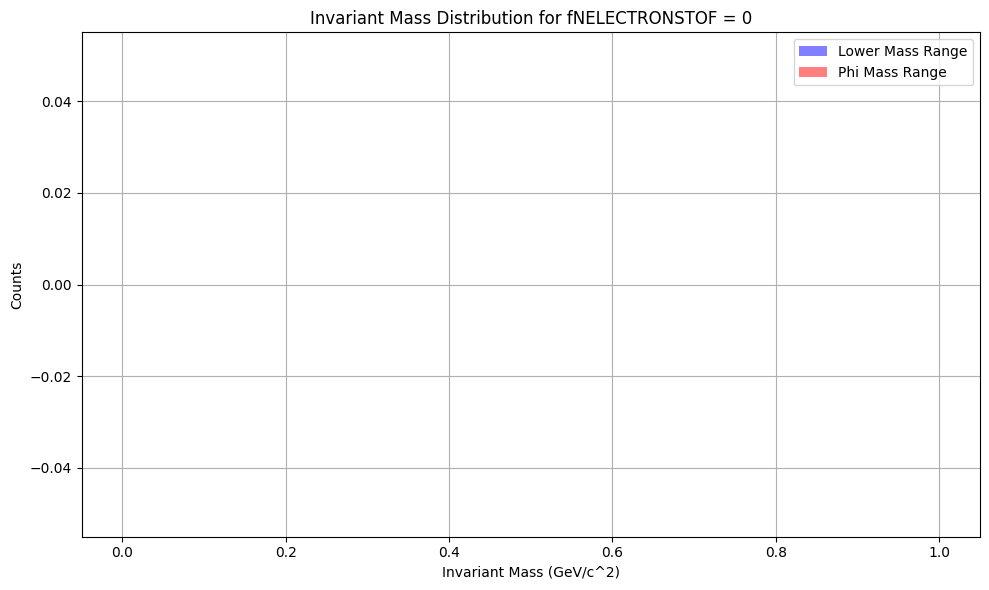

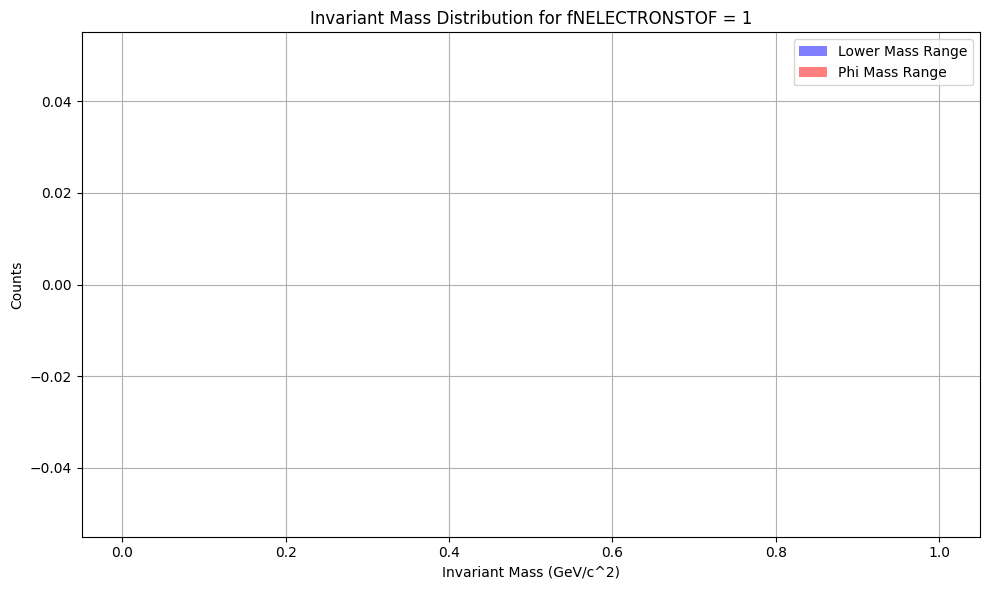

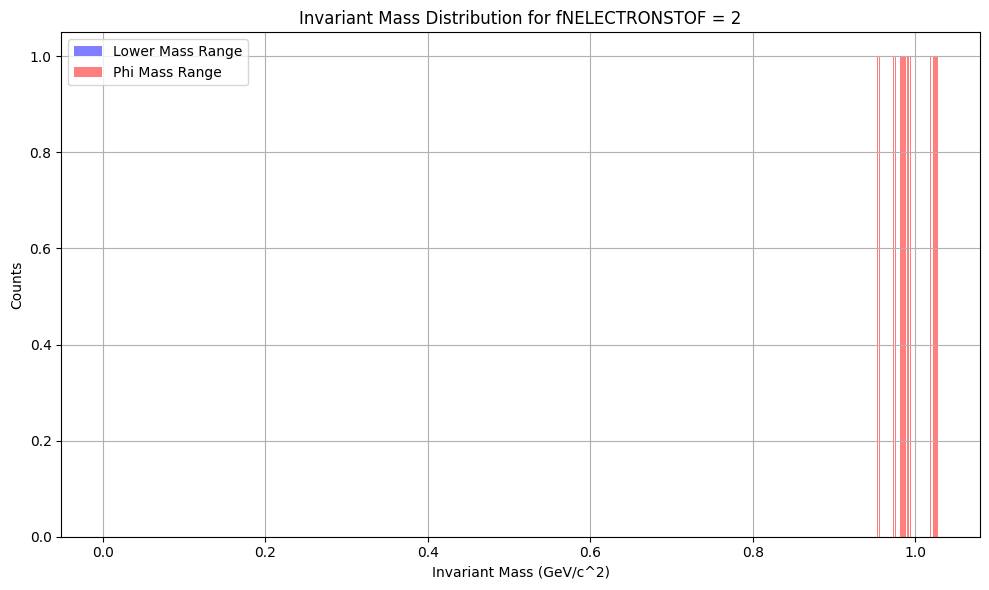

In [39]:
plot_invariant_mass_distributions(df_filtered_lower_mc, df_filtered_phi_mc)


In [ ]:
# # Print the feature names used during training
# print("Feature names used during training:")
# print(rf_model_filtered.feature_names_in_)


In [ ]:
import numpy as np

def create_feature_only_dataframes_from_filtered(filtered_dataframes):
    """
    Creates feature-only DataFrames from a dictionary of filtered DataFrames.

    Parameters:
    filtered_dataframes (list): List of filtered DataFrames, e.g., df_filtered_phi or df_filtered_lower.

    Returns:
    list: List of feature-only DataFrames corresponding to the input filtered DataFrames.
    """
    feature_dataframes = []

    for df in filtered_dataframes:
        # Calculate features
        dot_product = df["fPX1"] * df["fPX2"] + df["fPY1"] * df["fPY2"] + df["fPZ1"] * df["fPZ2"]
        magnitude1 = np.sqrt(df["fPX1"]**2 + df["fPY1"]**2 + df["fPZ1"]**2)
        magnitude2 = np.sqrt(df["fPX2"]**2 + df["fPY2"]**2 + df["fPZ2"]**2)
        opening_angle = np.arccos(dot_product / (magnitude1 * magnitude2))
        longitudinal_momentum_difference = abs(df["fPZ1"] - df["fPZ2"])
        energy_asymmetry = (df["fPE1"] - df["fPE2"]) / (df["fPE1"] + df["fPE2"])
        phi1 = np.arctan2(df["fPY1"], df["fPX1"])
        phi2 = np.arctan2(df["fPY2"], df["fPX2"])
        acoplanarity = 1 - np.abs(phi1 - phi2) / np.pi
        squared_momentum_difference = ((df["fPX1"] - df["fPX2"])**2 + 
                                        (df["fPY1"] - df["fPY2"])**2 + 
                                        (df["fPZ1"] - df["fPZ2"])**2)
        pt_ee = ((df["fPX1"] + df["fPX2"])**2 + (df["fPY1"] + df["fPY2"])**2)**0.5

        # Create feature-only DataFrame
        feature_df = pd.DataFrame({
            "pT (e+e-)": pt_ee,
            "Acoplanarity": acoplanarity,
            "Squared Momentum Difference": squared_momentum_difference,
            "Longitudinal Momentum Difference": longitudinal_momentum_difference,
            "Energy Asymmetry": energy_asymmetry,
            "Opening Angle": opening_angle,
        })
        feature_dataframes.append(feature_df)

    return feature_dataframes

# Example usage
df_features_lower = create_feature_only_dataframes_from_filtered(df_filtered_lower)
df_features_phi = create_feature_only_dataframes_from_filtered(df_filtered_phi)

# Print the number of rows in each subset for verification
for i, feature_df in enumerate(df_features_lower):
    print(f"Number of events in df_features_lower[{i}]: {len(feature_df)}")
    print(feature_df.head())

for i, feature_df in enumerate(df_features_phi):
    print(f"Number of events in df_features_phi[{i}]: {len(feature_df)}")
    print(feature_df.head())


Number of events in df_features_lower[0]: 2662
     pT (e+e-)  Acoplanarity  Squared Momentum Difference  \
208   0.034565      0.002181                     0.773668   
219   0.467415      0.317713                     0.890660   
265   0.058244      0.039533                     0.873966   
290   0.015489     -0.000985                     0.839626   
335   0.068220      0.001970                     0.844626   

     Longitudinal Momentum Difference  Energy Asymmetry  Opening Angle  
208                          0.047632          0.050980       1.844700  
219                          0.395031          0.065097       2.192043  
265                          0.089350          0.038958       1.970661  
290                          0.028246         -0.000131       2.150417  
335                          0.095113          0.014994       2.163854  
Number of events in df_features_lower[1]: 1085
     pT (e+e-)  Acoplanarity  Squared Momentum Difference  \
5     0.032446     -0.019543            

In [ ]:
df_features_phi[1].head()

,pT (e+e-),Acoplanarity,Squared Momentum Difference,Longitudinal Momentum Difference,Energy Asymmetry,Opening Angle
118,0.060145,-0.023117,0.948296,0.187447,-0.029379,2.910142
179,0.019302,-0.001904,0.973502,0.107373,-0.031845,2.907914
206,0.023464,-0.012040,1.063063,0.027227,0.006169,2.681472
269,0.004968,-0.002808,1.058361,0.448702,-0.018444,3.077524
376,0.067742,-0.005741,1.095748,0.450032,0.075423,3.117129


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os

def analyze_phi_predictions(feature_dataframes, original_df, model, output_folder='betterAnalysis'):
    """
    Passes feature DataFrames through the model, separates predictions into signal and background,
    and plots the invariant mass and pT distributions for both signal and background, as well as a 2D
    plot of invariant mass vs pT for predicted signal. Adds an extra plot for invariant mass distribution
    if pT > 0.3 GeV. This function focuses only on `df_features_phi`.

    Parameters:
    feature_dataframes (list): List containing prepared feature DataFrames for `df_features_phi`.
    original_df (list): List containing the corresponding original DataFrames (`df_filtered_phi`).
    model: Trained Random Forest model.
    output_folder (str): Folder to save the generated plots.
    """
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    # Ensure feature alignment
    expected_features = model.feature_names_in_

    for i, features_df in enumerate(feature_dataframes):
        # Align test DataFrame with training features
        features_df = features_df[expected_features]
        
        # Predict signal (phi) vs background
        predictions = model.predict(features_df)
        
        # Retrieve the corresponding events from the original DataFrame
        filtered_df = original_df[i].copy()
        
        # Add predictions to the filtered original DataFrame
        filtered_df["Prediction"] = predictions
        
        # Separate predicted signal and background
        signal_df = filtered_df[filtered_df["Prediction"] == 1]
        background_df = filtered_df[filtered_df["Prediction"] == 0]
        
        # Compute invariant mass
        def compute_invariant_mass(df):
            if df.empty:
                return np.array([])  # Return an empty array if the DataFrame is empty
            total_energy = df["fPE1"] + df["fPE2"]
            total_px = df["fPX1"] + df["fPX2"]
            total_py = df["fPY1"] + df["fPY2"]
            total_pz = df["fPZ1"] + df["fPZ2"]
            total_p = np.sqrt(total_px**2 + total_py**2 + total_pz**2)
            return np.sqrt(total_energy**2 - total_p**2)
        
        signal_invariant_mass = compute_invariant_mass(signal_df)
        background_invariant_mass = compute_invariant_mass(background_df)

        # Compute transverse momentum (pT)
        signal_pt = np.sqrt((signal_df["fPX1"] + signal_df["fPX2"])**2 + (signal_df["fPY1"] + signal_df["fPY2"])**2)
        background_pt = np.sqrt((background_df["fPX1"] + background_df["fPX2"])**2 + (background_df["fPY1"] + background_df["fPY2"])**2)

        # Filter for invariant mass if pT > 0.3 GeV
        signal_pt_cut = signal_df[signal_pt > 0.3]
        background_pt_cut = background_df[background_pt > 0.3]
        signal_invariant_mass_pt_cut = compute_invariant_mass(signal_pt_cut)
        background_invariant_mass_pt_cut = compute_invariant_mass(background_pt_cut)

        # Plot invariant mass distributions with fine binning
        if len(signal_invariant_mass) > 0 or len(background_invariant_mass) > 0:
            plt.figure(figsize=(10, 6))
            bins = np.arange(0.9, 1.1, 0.002)  # Fine binning: 5 MeV bins
            if len(signal_invariant_mass) > 0:
                plt.hist(signal_invariant_mass, bins=bins, color='blue', alpha=0.5, label='Predicted Signal (\u03D5(1020))', density=True)
            if len(background_invariant_mass) > 0:
                plt.hist(background_invariant_mass, bins=bins, color='red', alpha=0.5, label='Predicted Background', density=True)
            plt.xlabel("Invariant Mass (GeV/c$^2$)")
            plt.ylabel("Counts / bin")
            plt.legend()
            plt.grid()
            plt.tight_layout()
            plt.savefig(f"{output_folder}/invariant_mass_phi_{i}.pdf")
            plt.close()

        # Plot pT distributions
        if len(signal_pt) > 0 or len(background_pt) > 0:
            plt.figure(figsize=(10, 6))
            bins = np.linspace(0, 0.15, 50)  # Adjust binning for better resolution
            if len(signal_pt) > 0:
                plt.hist(signal_pt, bins=bins, color='blue', alpha=0.5, label='Predicted Signal (\u03D5(1020))', density=True)
            if len(background_pt) > 0:
                plt.hist(background_pt, bins=bins, color='red', alpha=0.5, label='Predicted Background', density=True)
            plt.xlabel("Transverse Momentum $p_T$ (GeV/c)")
            plt.ylabel("Counts / bin")
            plt.legend()
            plt.grid()
            plt.tight_layout()
            plt.savefig(f"{output_folder}/pt_phi_{i}.pdf")
            plt.close()

        # 2D plot: invariant mass vs pT for predicted signal
        if len(signal_invariant_mass) > 0 and len(signal_pt) > 0:
            plt.figure(figsize=(10, 8))
            plt.hist2d(signal_invariant_mass, signal_pt, bins=(50, 50), cmap='viridis')
            plt.colorbar(label="Counts")
            plt.xlabel("Invariant Mass (GeV/c$^2$)")
            plt.ylabel("Transverse Momentum $p_T$ (GeV/c)")
            plt.title("Predicted Signal (\u03D5(1020))")
            plt.tight_layout()
            plt.savefig(f"{output_folder}/invariant_mass_vs_pt_phi_{i}.pdf")
            plt.close()

        # Plot invariant mass distributions for events with pT > 0.3 GeV
        if len(signal_invariant_mass_pt_cut) > 0 or len(background_invariant_mass_pt_cut) > 0:
            plt.figure(figsize=(10, 6))
            bins = np.arange(0.9, 1.1, 0.002)  # Fine binning: 5 MeV bins
            if len(signal_invariant_mass_pt_cut) > 0:
                plt.hist(signal_invariant_mass_pt_cut, bins=bins, color='blue', alpha=0.5, label='Predicted Signal (\u03D5(1020)) with $p_T > 0.3$ GeV', density=True)
            if len(background_invariant_mass_pt_cut) > 0:
                plt.hist(background_invariant_mass_pt_cut, bins=bins, color='red', alpha=0.5, label='Predicted Background with $p_T > 0.3$ GeV', density=True)
            plt.xlabel("Invariant Mass (GeV/c$^2$)")
            plt.ylabel("Counts / bin")
            plt.legend()
            plt.grid()
            plt.tight_layout()
            plt.savefig(f"{output_folder}/invariant_mass_pt_cut_phi_{i}.pdf")
            plt.close()

    print(f"Plots saved to folder: {output_folder}")


In [ ]:
# Example usage
# analyze_phi_predictions(df_features_phi, df_filtered_phi, rf_model_filtered)


### Mixed model: ALICE sidebands, STARlight phi

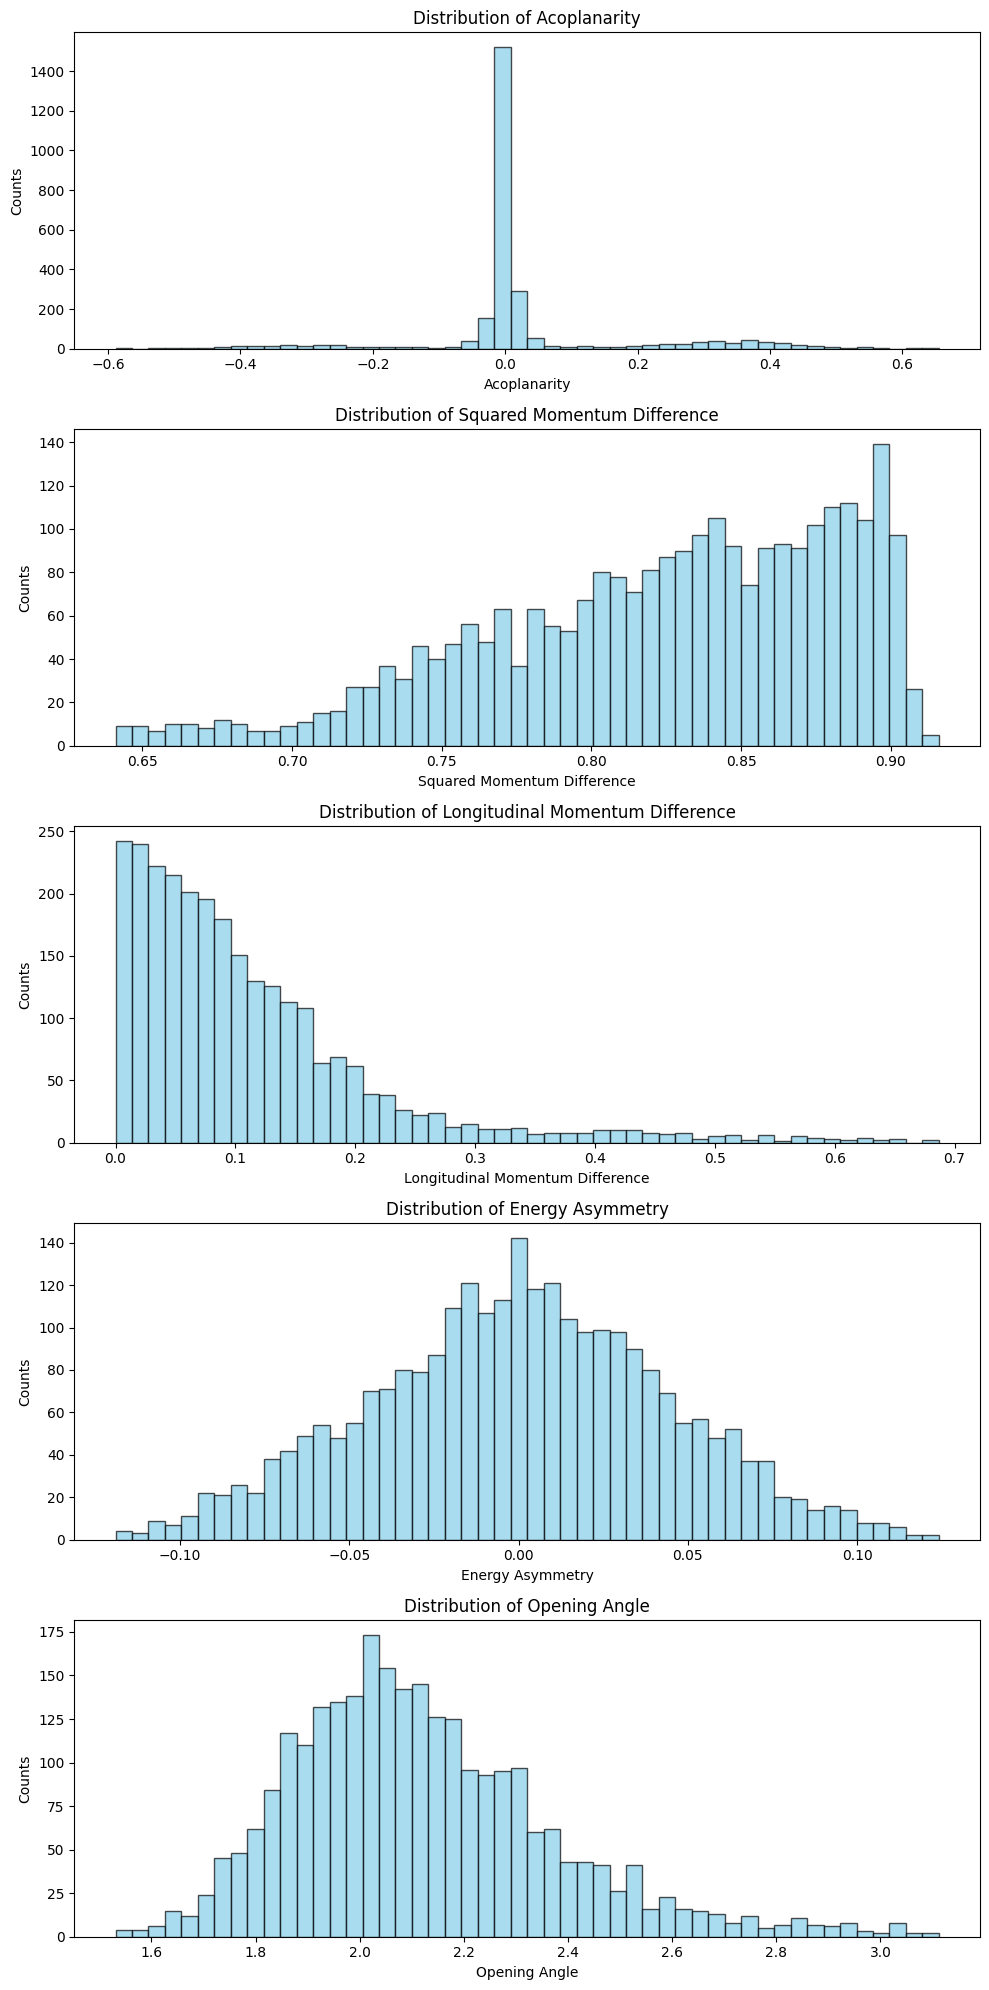

In [ ]:
plot_features(df_features_lower[0])

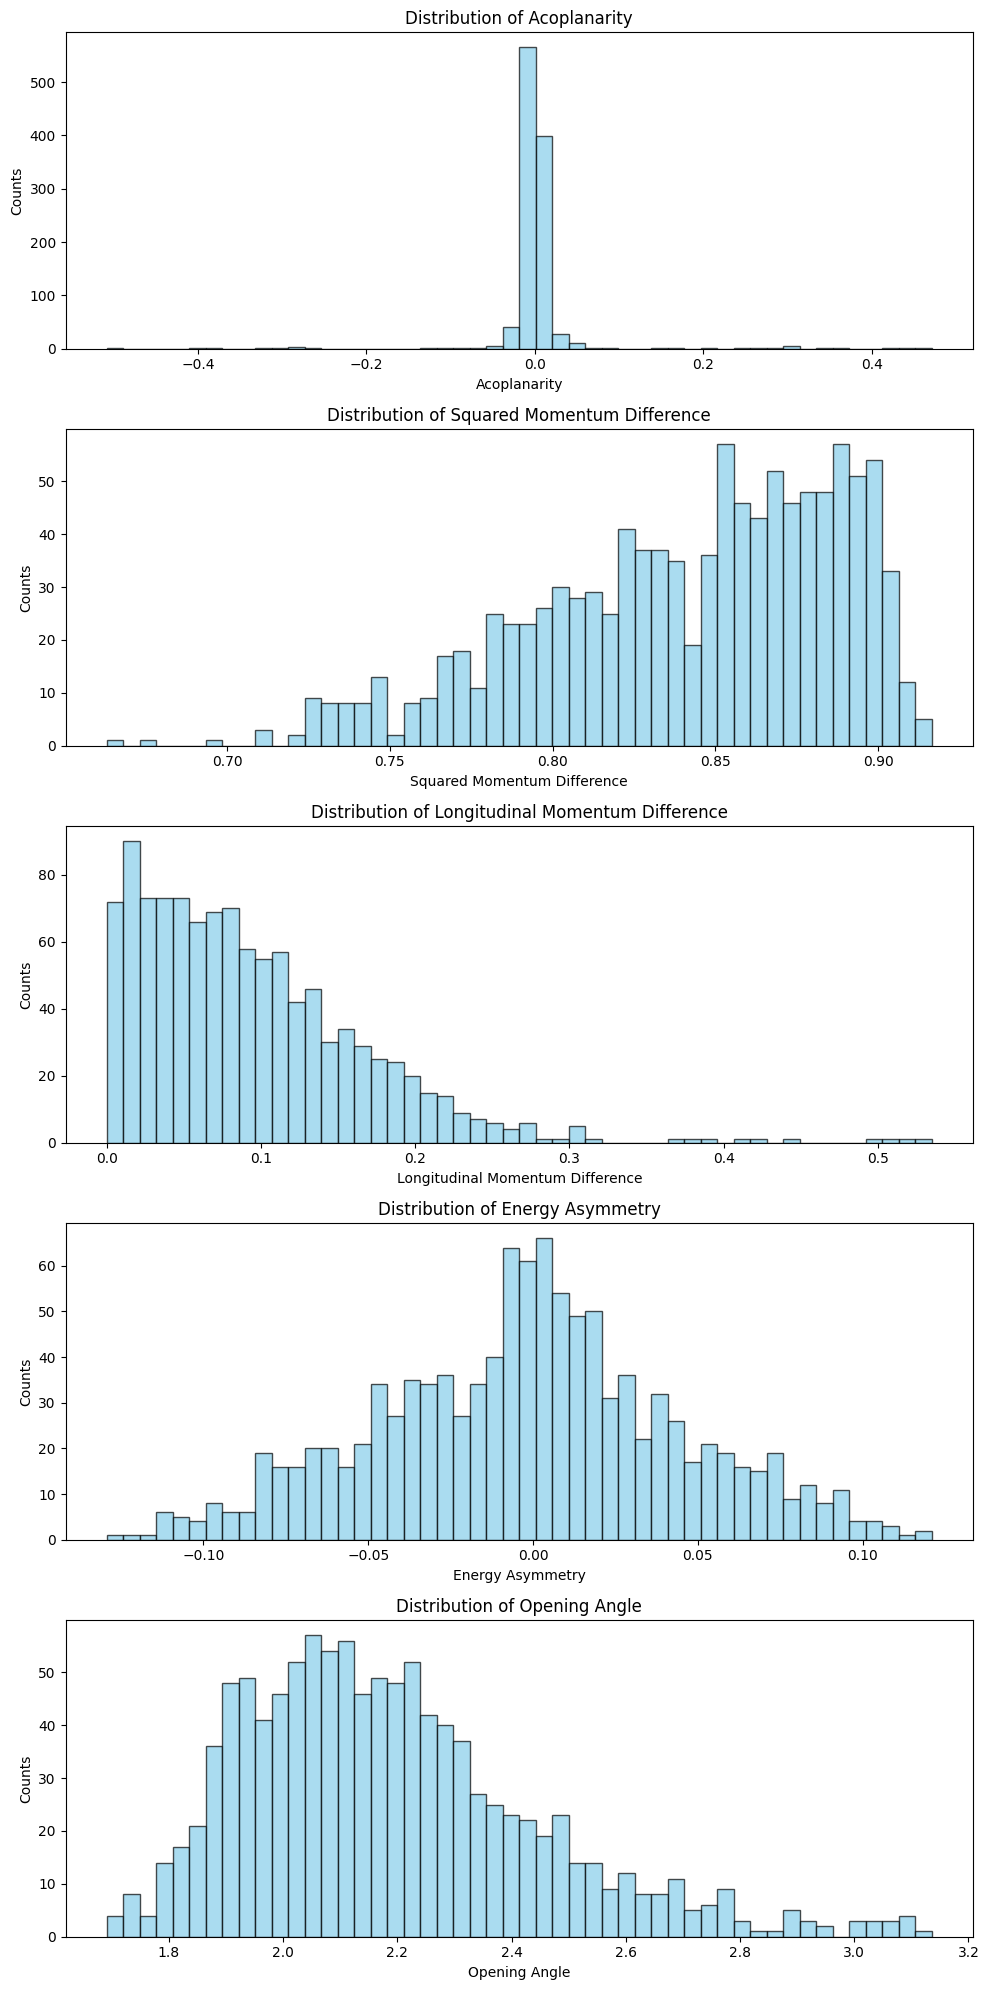

In [ ]:
plot_features(df_features_lower[1])

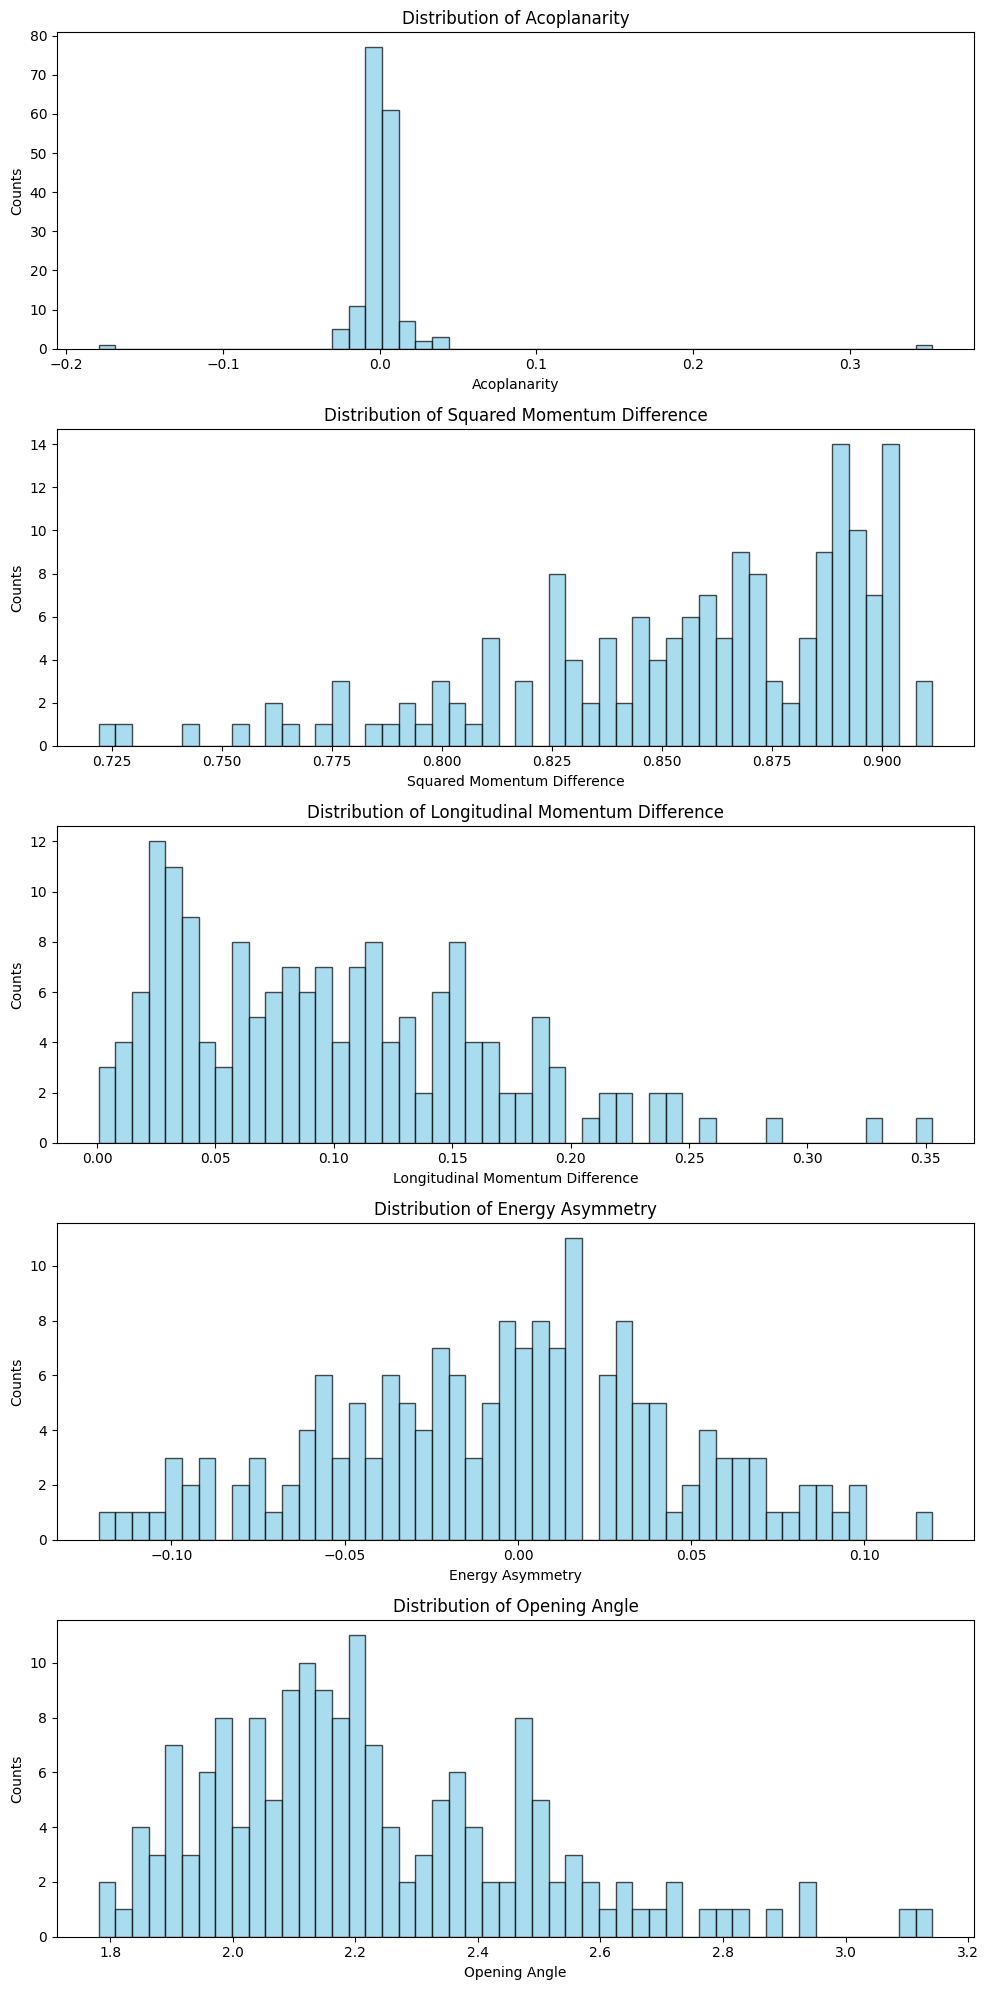

In [ ]:
plot_features(df_features_lower[2])

In [ ]:
df_features_lower[0].head()

,pT (e+e-),Acoplanarity,Squared Momentum Difference,Longitudinal Momentum Difference,Energy Asymmetry,Opening Angle
208,0.034565,0.002181,0.773668,0.047632,0.050980,1.844700
219,0.467415,0.317713,0.890660,0.395031,0.065097,2.192043
265,0.058244,0.039533,0.873966,0.089350,0.038958,1.970661
290,0.015489,-0.000985,0.839626,0.028246,-0.000131,2.150417
335,0.068220,0.001970,0.844626,0.095113,0.014994,2.163854


In [ ]:
features_df.head()

,Event Number,Invariant Mass,pT (e+e-),Squared Momentum Difference,Acoplanarity,Energy Asymmetry,Longitudinal Momentum Difference,Opening Angle
0,1,1.019105,0.049644,0.001367,0.031132,0.033901,0.108016,2.416859
1,2,1.026712,0.035786,0.000114,0.015473,-0.010213,0.190259,2.756913
2,3,1.022900,0.026768,0.002767,0.009099,0.050971,0.555489,2.895069
3,4,1.022102,0.048372,0.003278,0.021657,-0.050388,0.201350,2.242625
4,5,1.019904,0.070026,0.018480,0.043915,-0.129193,0.464285,2.716208


In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, roc_curve
import matplotlib.pyplot as plt


def prepare_training_data(phi_features_df, background_features_df):
    """
    Prepares the combined dataset with labels for training.
    - phi_features_df: DataFrame with features for phi -> e+ e- events (signal, label 1)
    - background_features_df: DataFrame with features for background events (label 0)
    
    Returns:
    X, y: Feature matrix and labels
    """
    # Assign labels
    phi_features_df['Label'] = 1  # Signal
    background_features_df['Label'] = 0  # Background
    
    # Combine datasets
    combined_df = pd.concat([phi_features_df, background_features_df], ignore_index=True)
    
    # Separate features and labels
    X = combined_df.drop(columns=['Label'])  # Drop the label column
    y = combined_df['Label']
    
    return X, y


In [ ]:
def train_random_forest(phi_features_df, background_features_df):
    """
    Trains a Random Forest classifier on the given data and evaluates its performance.
    
    Parameters:
    phi_features_df (pd.DataFrame): DataFrame with features for phi -> e+ e- events (signal, label 1)
    background_features_df (pd.DataFrame): DataFrame with features for background events (label 0)
    
    Returns:
    model: Trained Random Forest model
    """
    # Prepare training data
    X, y = prepare_training_data(phi_features_df, background_features_df)
    
    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
    # Initialize the Random Forest classifier
    rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
    
    # Train the model
    rf_model.fit(X_train, y_train)
    
    # Predictions
    y_pred = rf_model.predict(X_test)
    y_pred_proba = rf_model.predict_proba(X_test)[:, 1]
    
    # Evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    print(f"Accuracy: {accuracy:.3f}")
    print(f"ROC-AUC: {roc_auc:.3f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    
    # Feature importance
    feature_importances = rf_model.feature_importances_
    feature_names = X_train.columns
    plt.figure(figsize=(10, 6))
    plt.barh(feature_names, feature_importances, color='skyblue')
    plt.title("Feature Importance")
    plt.xlabel("Importance")
    plt.ylabel("Feature")
    plt.show()
    
    # ROC Curve
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
    plt.figure(figsize=(10, 6))
    plt.plot(fpr, tpr, label=f'Random Forest (AUC = {roc_auc:.3f})')
    plt.plot([0, 1], [0, 1], 'k--', label="Random")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve")
    plt.legend(loc="lower right")
    plt.show()
    
    return rf_model


In [ ]:
len(features_df)

10000

In [ ]:
len(df_features_lower[0])

2662

Accuracy: 1.000
ROC-AUC: 1.000

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       768
           1       1.00      1.00      1.00      3031

    accuracy                           1.00      3799
   macro avg       1.00      1.00      1.00      3799
weighted avg       1.00      1.00      1.00      3799



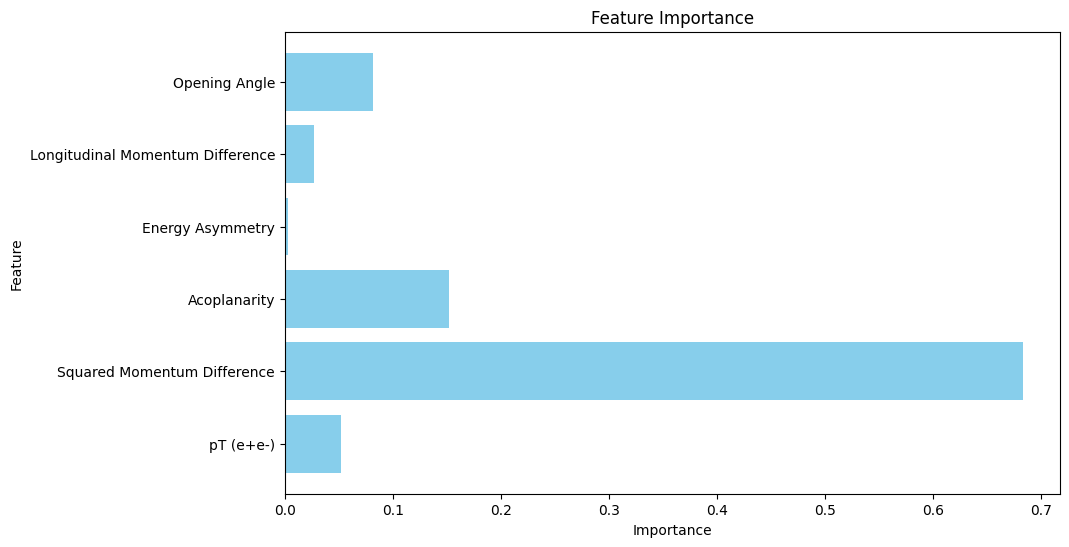

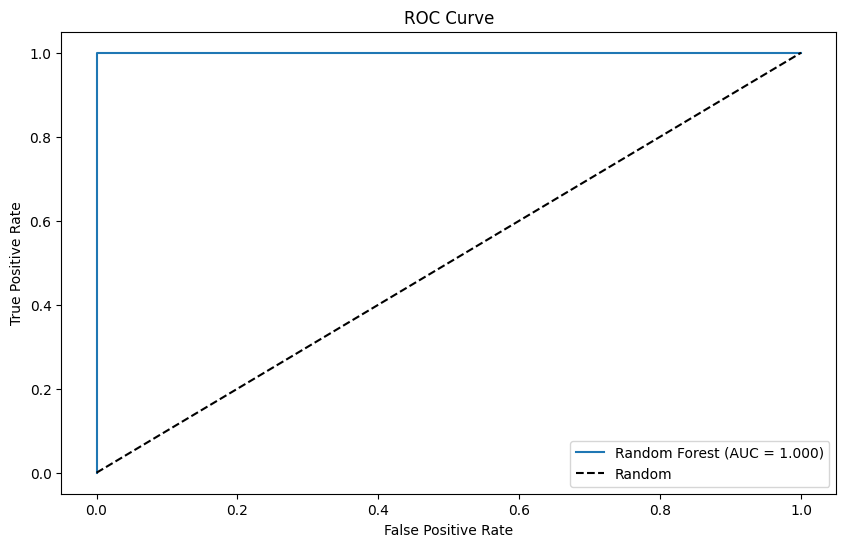

In [ ]:
# Prepare the STARlight phi(1020) dataset
phi_df = features_df.drop(columns=['Event Number', 'Invariant Mass'])  # Drop unnecessary columns

# Train the model with STARlight signal and ALICE background
rf_model = train_random_forest(phi_df, df_features_lower[0])


In [ ]:
# Example usage
analyze_phi_predictions(df_features_phi, df_filtered_phi, rf_model)


Plots saved to folder: betterAnalysis
